<a href="https://colab.research.google.com/github/omkardesai98/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Sumit Berde
##### **Team Member 2 -** Omkar Desai


# **Project Summary -**

#### 1. Rental bikes is a multi-billion dollar industry,whose popularity is increasing among masses for short distance travelling within cities.To keep up with the demand,it is important to predict the demand for rented bikes per hourly basis to increase the customer satisfaction by reducing the waiting time thus giving an edge over other competitors.
#### 2. In this project we have built various regression models to predict the demand for rented bikes.Models used are Linear regression with lasso and ridge regularization,Decision tree,Random forest,Gradient Boosting and XG Boosting.Based on the R2 score,we have found Gradient Boosting model the most accurate model.Gradient Boosting seems to have generalised well on the given data.  

# **GitHub Link -**

https://github.com/omkardesai98/Bike-Sharing-Demand-Prediction

# **Problem Statement**


## Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The main aim of the project is to make prediction of bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

#set style
plt.style.use('seaborn')


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/cohort-chicago/Capston Project ML 1/SeoulBikeData.csv'

df = pd.read_csv(file_path,encoding = 'latin')

### Dataset First View

In [4]:
# Checking first 5 rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Checking last 5 rows
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Total rows are: {df.shape[0]} ')
print(f'Total columns are: {df.shape[1]} ')

Total rows are: 8760 
Total columns are: 14 


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# Renaming columns to remove units 
df = df.rename(columns={'Rented Bike Count':'Rented_bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility',
                   'Dew point temperature(°C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_radiation','Rainfall(mm)':'Rainfall',
                   'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_day'})

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {df.duplicated().sum()}')

The number of duplicate rows are 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                     0
Rented_bike_count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_day          0
dtype: int64

In [11]:
df.head()

Date  Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

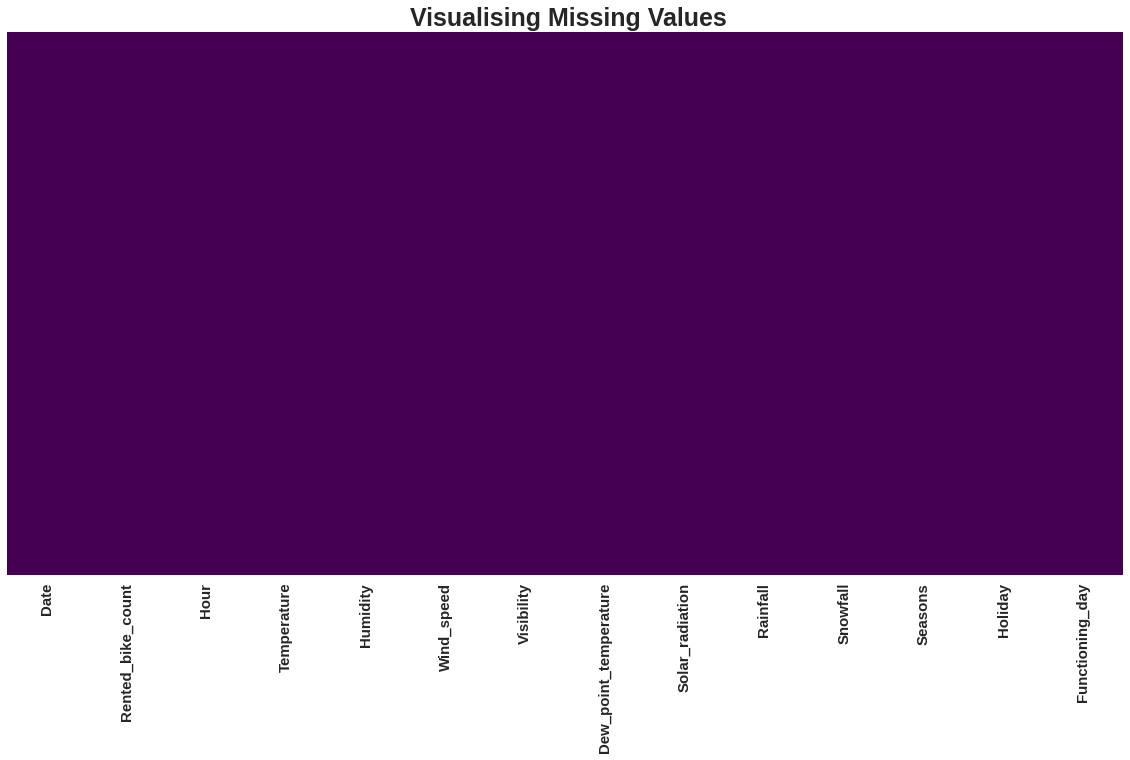

In [12]:
# Visualizing the missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False,cbar=False)
plt.title(" Visualising Missing Values");

### What did you know about your dataset?

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>




## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print(df.columns)

Index(['Date', 'Rented_bike_count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_day'],
      dtype='object')


In [14]:
# Dataset Describe
df.describe().T

count         mean         std   min     25%      50%  \
Rented_bike_count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   

                           75%      max  
Rented_bike_count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80

### Variables Description 



* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - Yes/No

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in ['Hour','Seasons','Holiday','Functioning_day']:
  print(f'Unique values in {i} are {df[i].unique()}')


Unique values in Hour are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']
Unique values in Holiday are ['No Holiday' 'Holiday']
Unique values in Functioning_day are ['Yes' 'No']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
def visibility_bin(x):
  '''creating bin for snow visibility'''
  try:
      if x['Visibility'] <= 500 :
        return 'heavy snow'
      elif x['Visibility'] > 1000 :
          return 'light snow'
      else:
          return 'medium snow'
  except:
    print('something is wrong')

In [17]:
#creating bin for visibility feature as snowfall and visibility have relation as they both depend on each other 
df['visibility_bin'] = df.apply(lambda x : visibility_bin(x),axis = 1)

In [18]:
df.head()

Date  Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_day visibility_bin  
0  Winter  No Holiday             Yes     light snow  
1  Winter  No Holiday             Yes     light snow  
2  Winter  No Holiday             Yes     light snow  
3  Winter  No Holiday             Yes     light snow  
4  Winter  No Holiday             Yes     light snow

In [19]:
# Dropping columns Visibility
df.drop(columns=['Visibility'],axis=1,inplace=True)

# Dropping snowfall column as it has relationship with visibility. As snowfall is high,visibility is less and vice versa
df.drop(columns=['Snowfall'],axis=1,inplace=True)

In [20]:
df['visibility_bin'].value_counts()

light snow     6379
medium snow    1317
heavy snow     1064
Name: visibility_bin, dtype: int64

In [21]:
df.head()

Date  Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   Dew_point_temperature  Solar_radiation  Rainfall Seasons     Holiday  \
0                  -17.6              0.0       0.0  Winter  No Holiday   
1                  -17.6              0.0       0.0  Winter  No Holiday   
2                  -17.7              0.0       0.0  Winter  No Holiday   
3                  -17.6              0.0       0.0  Winter  No Holiday   
4                  -18.6              0.0       0.0  Winter  No Holiday   

  Functioning_day visibility_bin  
0             Yes     light snow  
1             Yes     light snow  
2             Yes     light snow  
3             Yes     light snow  
4             Yes     light snow

In [22]:
# df['visibility_bin'].astype()

In [23]:
# Converting 'date' datatype to 'datetime' datatype
df['Date'] = pd.to_datetime(df['Date'])

# Extracting month from date column
df['Month']=df['Date'].dt.month

# Extracting day_name from date column
df['Day_name']=df['Date'].dt.day_name()

In [24]:
# Checking if it is a weekend or not using 'Day_name' column
df['Is_weekend']=df['Day_name'].apply(lambda x:1 if (x=='Saturday'or x=='Sunday') else 0)

In [25]:
# Droping columns 'Date' and 'Day_name' as we got required 'Is_weekend' column for analysis
df.drop(columns=['Date','Day_name'],axis=1,inplace=True)

In [26]:
# Checking value counts for categorical columns
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [27]:
# Checking value counts for categorical columns
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [28]:
# Checking value counts for categorical columns
df['Functioning_day'].value_counts()

Yes    8465
No      295
Name: Functioning_day, dtype: int64

In [29]:
# Checking value counts for categorical columns
df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [30]:
# Checking value counts for categorical columns
df['Is_weekend'].value_counts()

0    6216
1    2544
Name: Is_weekend, dtype: int64

In [31]:
# Checking value counts for categorical columns
df['Functioning_day'].value_counts()

Yes    8465
No      295
Name: Functioning_day, dtype: int64

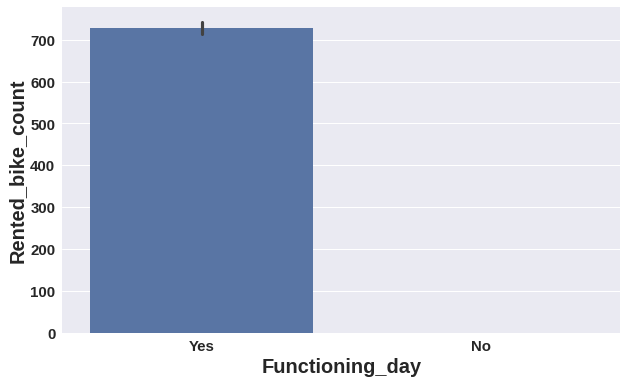

In [32]:
# Barplot between 'Functioning_day' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Functioning_day'],y=df['Rented_bike_count']);

In [33]:
# Taking only functioning days into account.Hence dropping 295 rows 
df = df[df['Functioning_day']=='Yes']

# Dropping 'Functioning_day' feature as it is no point keeping 'Yes' category in categorical column.
df.drop(columns=['Functioning_day'],axis=1,inplace=True)

In [34]:
# Creating numeric features list from dataset
num_features = df.describe().columns.to_list()

# Deleting 'Month' and 'Is_weekend' from num_features as they are categorical features
del num_features[-1:-3:-1]

# Creating categorical features list from dataset
cat_features = set(df.columns)-set(num_features)

print(f'Numeric features are {num_features}')
print(f'Categorical features are {cat_features}')

Numeric features are ['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall']
Categorical features are {'Month', 'Seasons', 'Holiday', 'Is_weekend', 'visibility_bin'}


In [35]:
df.head()

Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  \
0                254     0         -5.2        37         2.2   
1                204     1         -5.5        38         0.8   
2                173     2         -6.0        39         1.0   
3                107     3         -6.2        40         0.9   
4                 78     4         -6.0        36         2.3   

   Dew_point_temperature  Solar_radiation  Rainfall Seasons     Holiday  \
0                  -17.6              0.0       0.0  Winter  No Holiday   
1                  -17.6              0.0       0.0  Winter  No Holiday   
2                  -17.7              0.0       0.0  Winter  No Holiday   
3                  -17.6              0.0       0.0  Winter  No Holiday   
4                  -18.6              0.0       0.0  Winter  No Holiday   

  visibility_bin  Month  Is_weekend  
0     light snow      1           0  
1     light snow      1           0  
2     light snow      1           0  
3     light snow      1           0  
4     light snow      1           0

### What all manipulations have you done and insights you found?

1. Visibility and Snowfall have a relationship that if the snowfall is heavy then visibility is low which leads to less rental_bike_count.Similarly if the snowfall is less then visibility is high which increases rental_bike_count.Hence visibility is binned into High snowfall,Medium snowfall and Low snowfall. 
2. Date column was used to extract month,weekend_or_not features to check to check variations with respect to target variable as per seasons.
3. Categorical features do not have class imbalance, every category in the features were represented properly.
4. Taking only functioning days into account as on non-function days zero bikes are rented which is off no use to us.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### 1. Plotting barplot for each 'categorical variable' with respect to the target variable 'rental_bike_count'

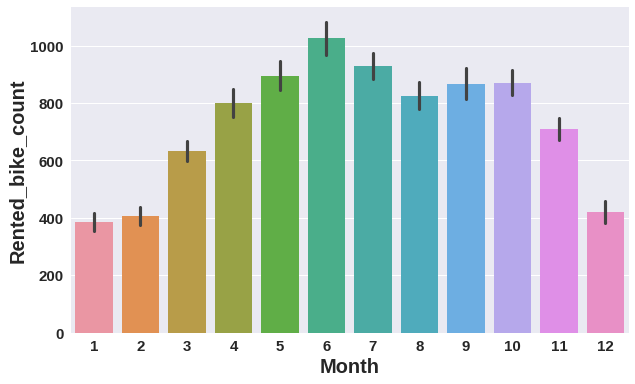

In [36]:
# Barplot between 'Functioning_day' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Month'],y=df['Rented_bike_count']);

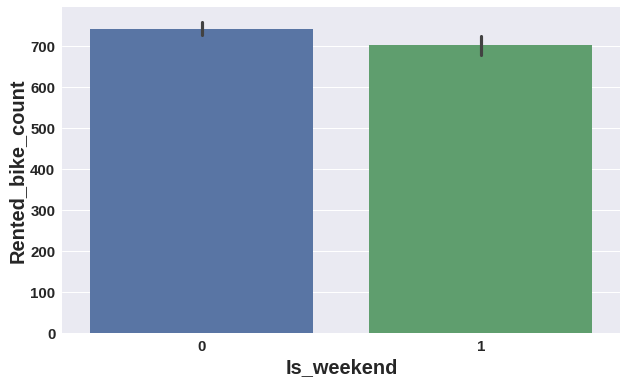

In [37]:
# Barplot between 'Is_weekend' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Is_weekend'],y=df['Rented_bike_count']);

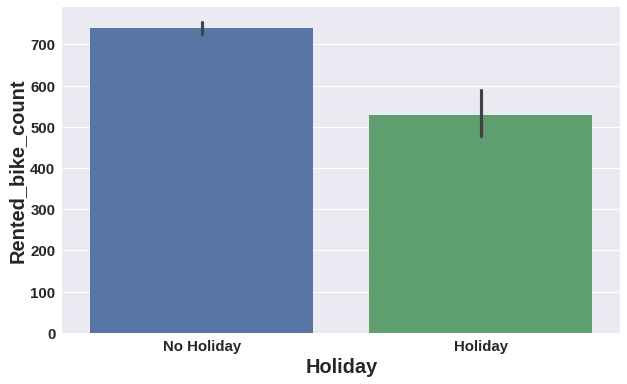

In [38]:
# Barplot between 'Holiday' and 'Rented_bike_count'
plt.figure(figsize=(10,6))
sns.barplot(x=df['Holiday'],y=df['Rented_bike_count']);

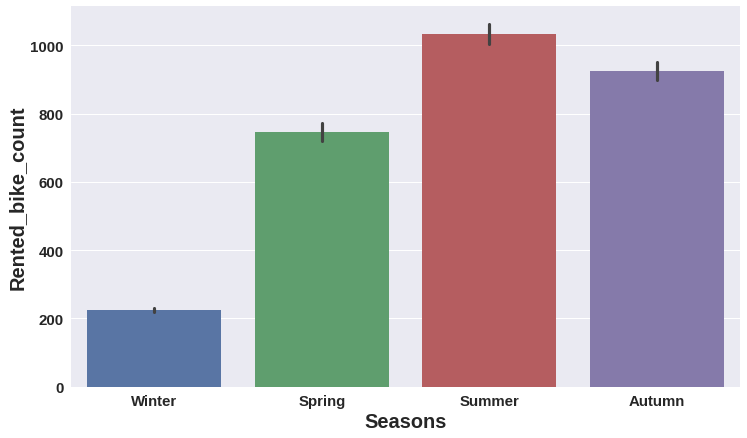

In [39]:
# # Barplot between 'Seasons' and 'Rented_bike_count'
plt.figure(figsize=(12,7))
sns.barplot(x=df['Seasons'],y=df['Rented_bike_count']);

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

##### 2. What is/are the insight(s) found from the chart?

1.  On 'No functioning' day no bike was rented
2. From March bike rent count increases and it was highest in June.
3. Bike rented were more or less same on weekdays and weekends.
4. Bike rented on 'No Holiday' were more than on 'Holidays'.
5. In summer season most bikes were rented and in winter least bikes were rented      

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. On 'Non Functioning' day,looks like the company had closed the business on maintainance purposes hence no bikes were rented.
2. Bikes rented are more on 'No Holiday' as people travel to reach their offices.This gives an indication to open bike rental outlets near railway stations where people need to travel further using buses from the railway station to reach their offices. 
3. People don't like to rent bikes in winter season due to snowfall and rainfall.

#### 2. Plotting regreesion plot between 'Numeric features' and target variable 'Rented_bike_count'

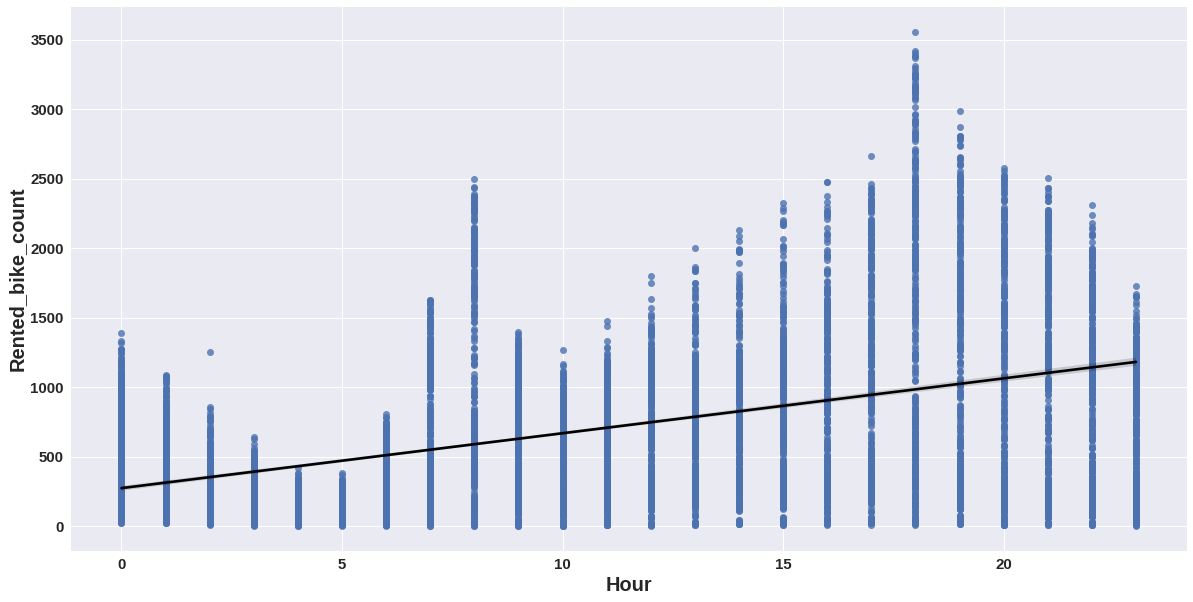

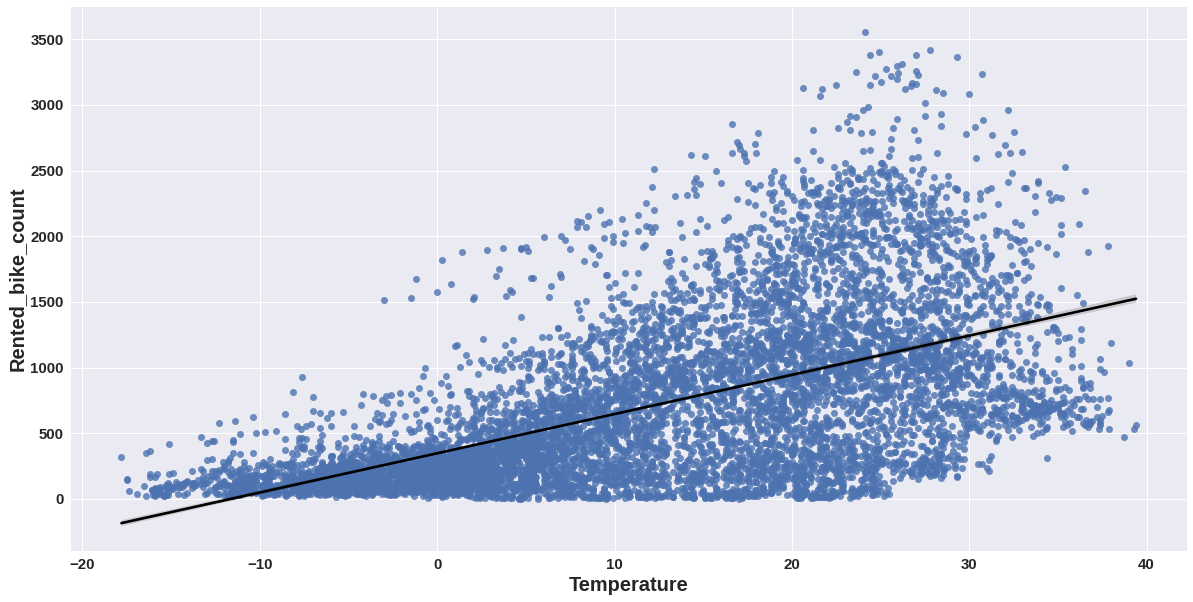

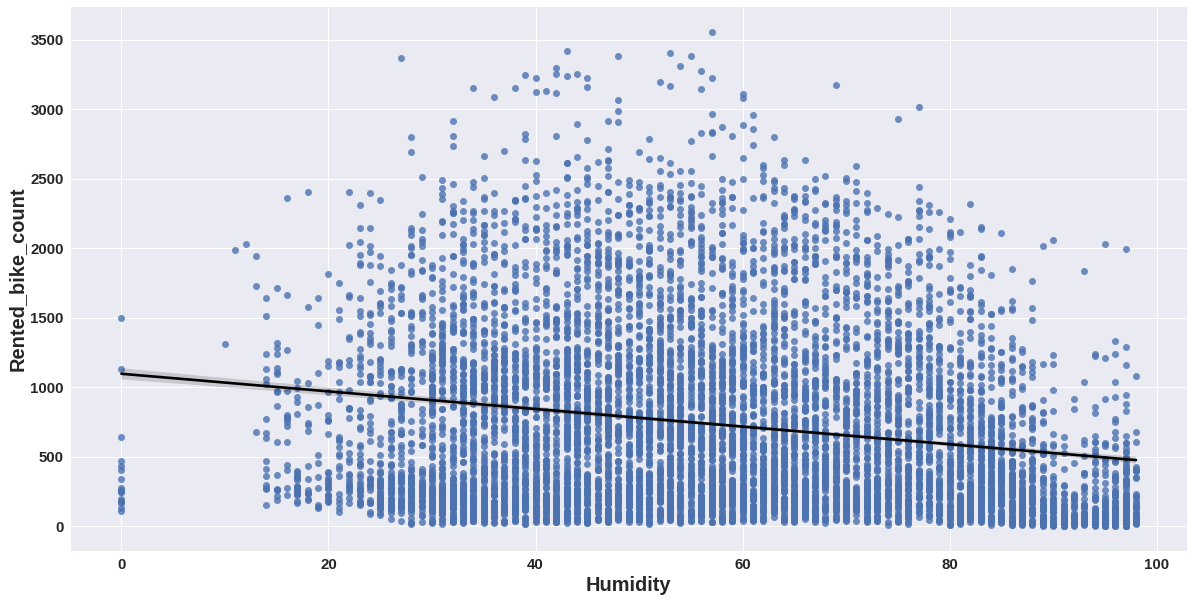

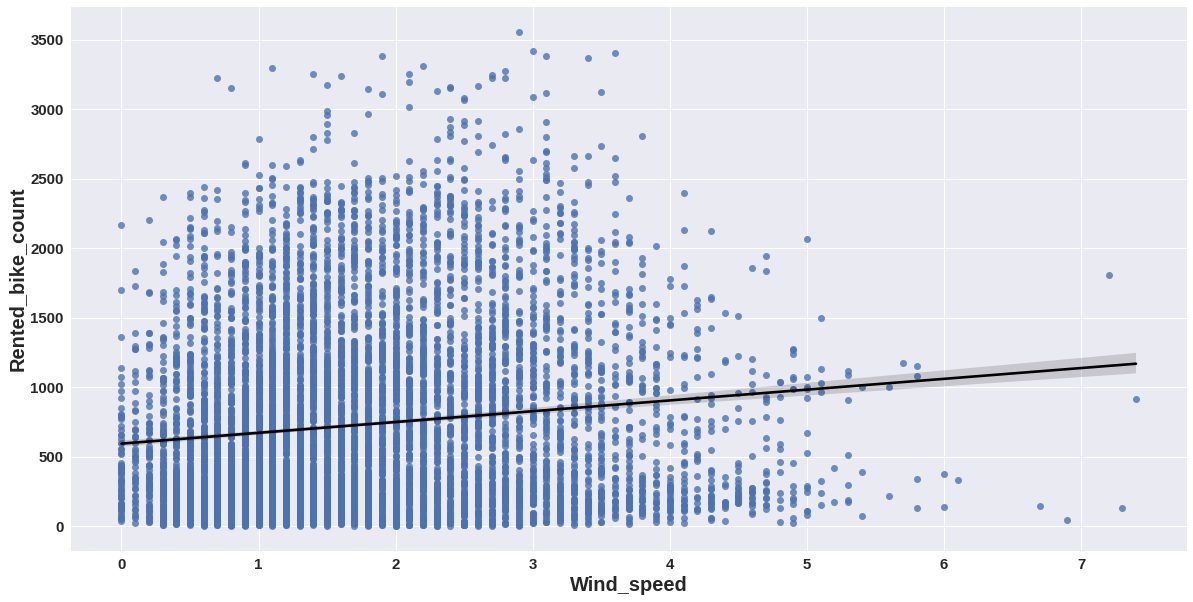

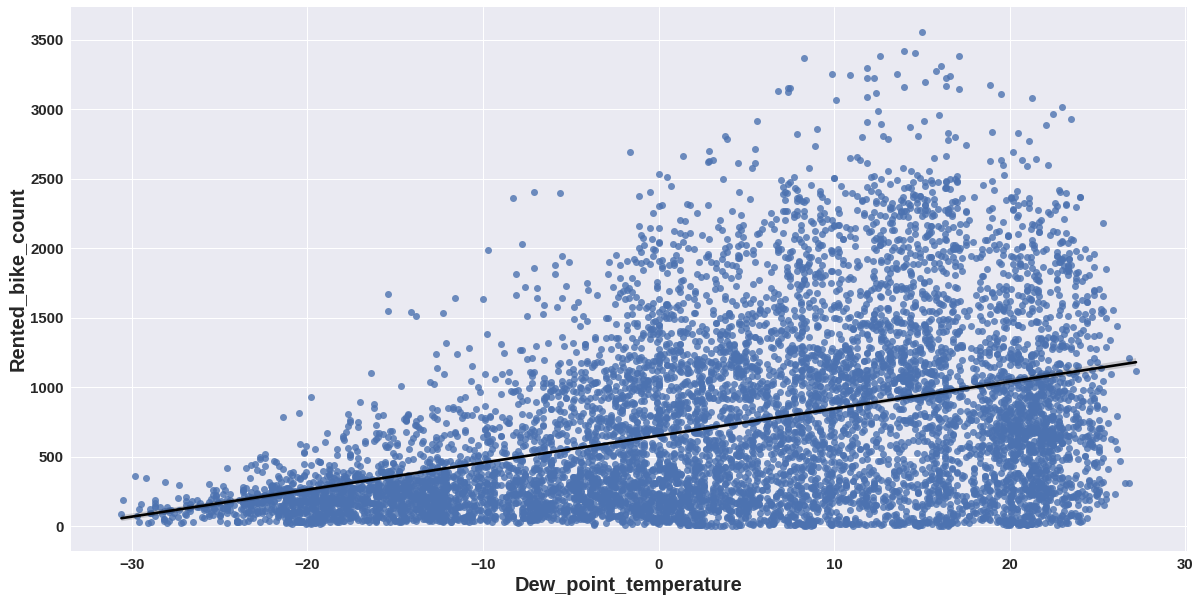

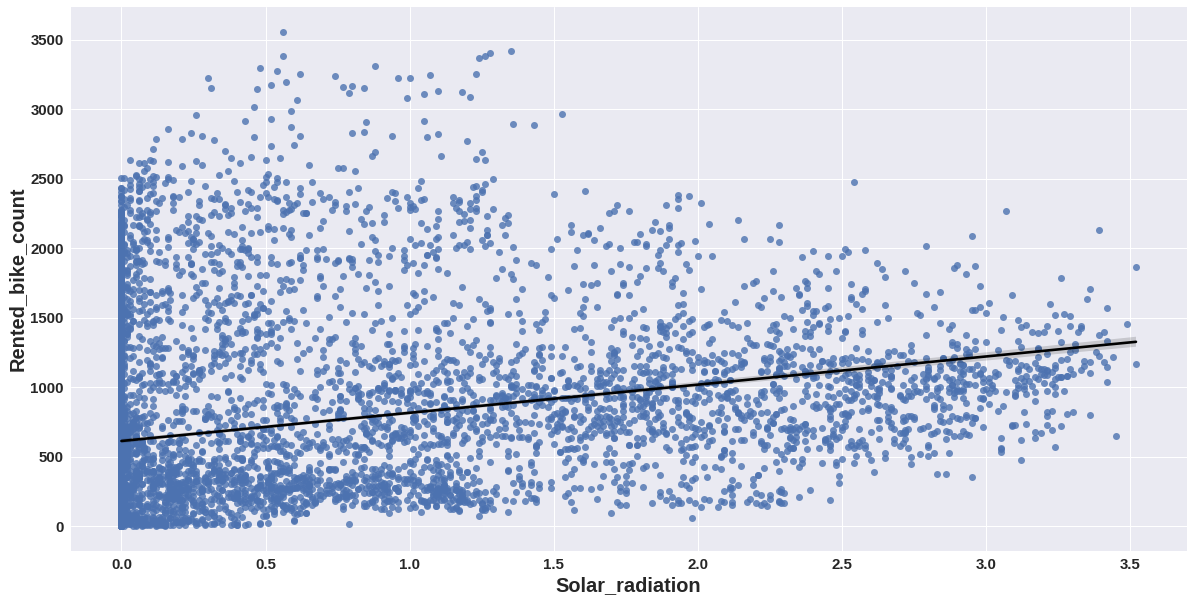

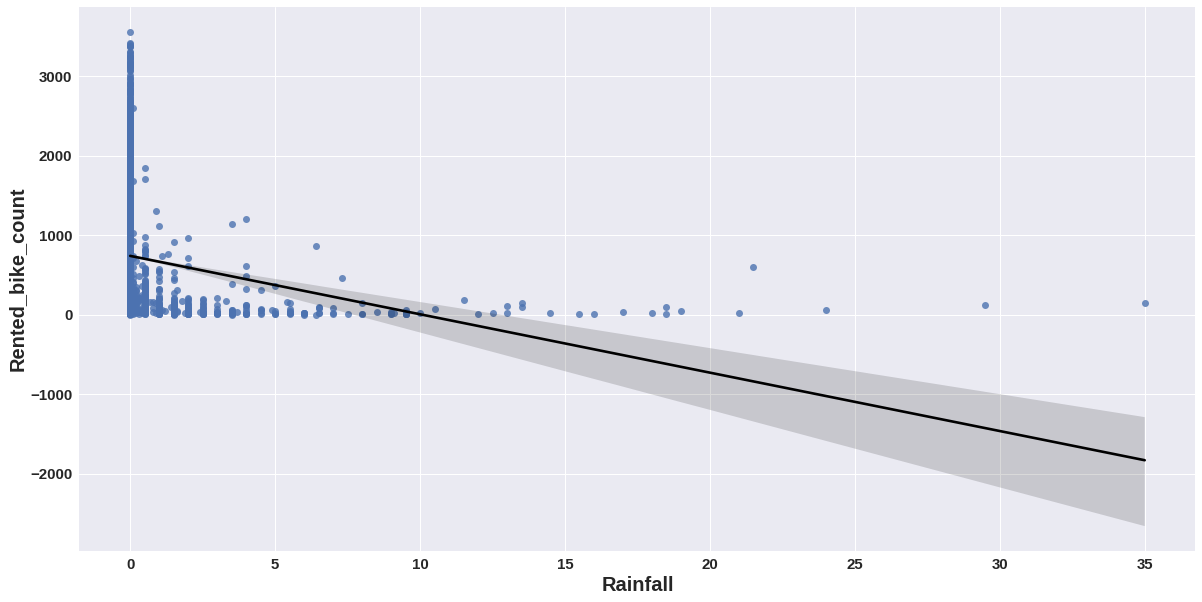

In [40]:
# Plotting regression line between 'Numeric features' and 'Rented_bike_count' to check linearity
for col in num_features[1:]:
 plt.figure(figsize=(20,10))
 sns.regplot(x=df[col],y=df['Rented_bike_count'],line_kws={'color':'black'})

##### 1. Why did you pick the specific chart?

Regression plot is plotted between continuous variables to check wheather linearity exist or not and tries to fit the best line possible   

##### 2. What is/are the insight(s) found from the chart?

1. Some kind of linearity exists between 'rented_bike_count' and 'temperature'.As temperature increases rented_bike_count also increases. People don't like to rent bike in cold temperatures which is shown above where rented_bike_count is less in winter.
2. Very little linearity exist between 'rented_bike_count' and 'humidity','wind_speed','visibility' and 'solar_radiation'.
3. Some linearity exist between 'rented_bike_count' and 'dew_point_temperature'.Same relationship as temperature.
4. Strong relationship exist between 'rented_bike_count' and 'rainfall' and 'snowfall'. As snowfall increases rented_bike_count decreases, same indication as less bike counts in winter. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Only 'temperature','dew_point_temperature' shows some kind of linear relationship.
2. Every other column is not linearly dependent on target variable.
3. Thus linear model will have less accuracy as only few columns show linear relationship.

#### 3. Plotting Pointplot to check variation of 'rented_bike_count' with respect to 'hour of the day' taking categorical columns into consideration. 

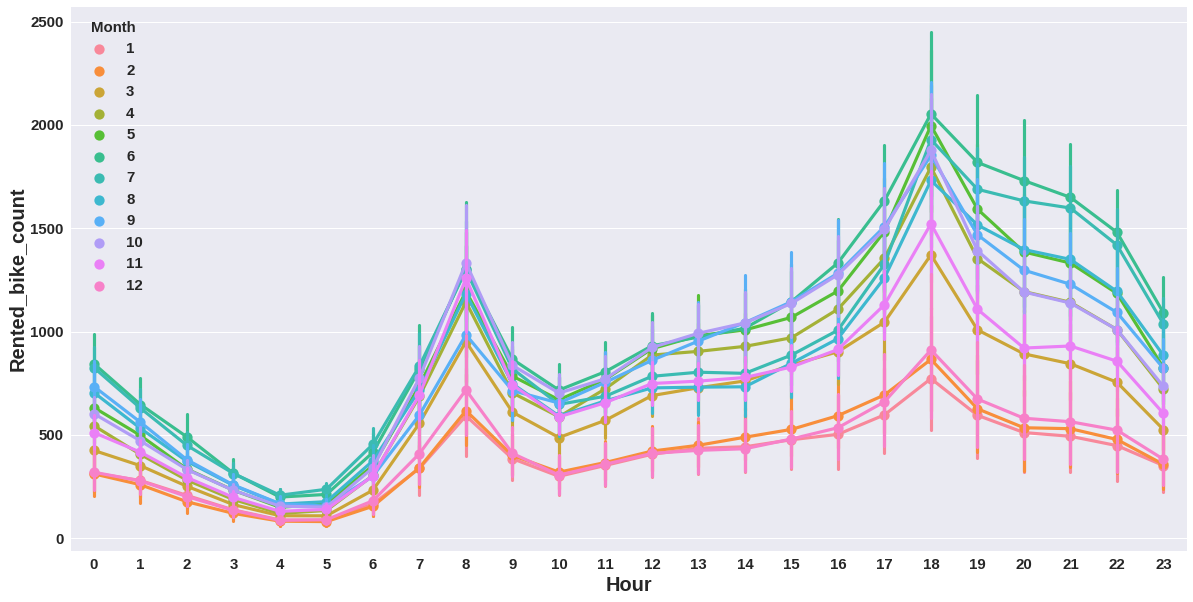

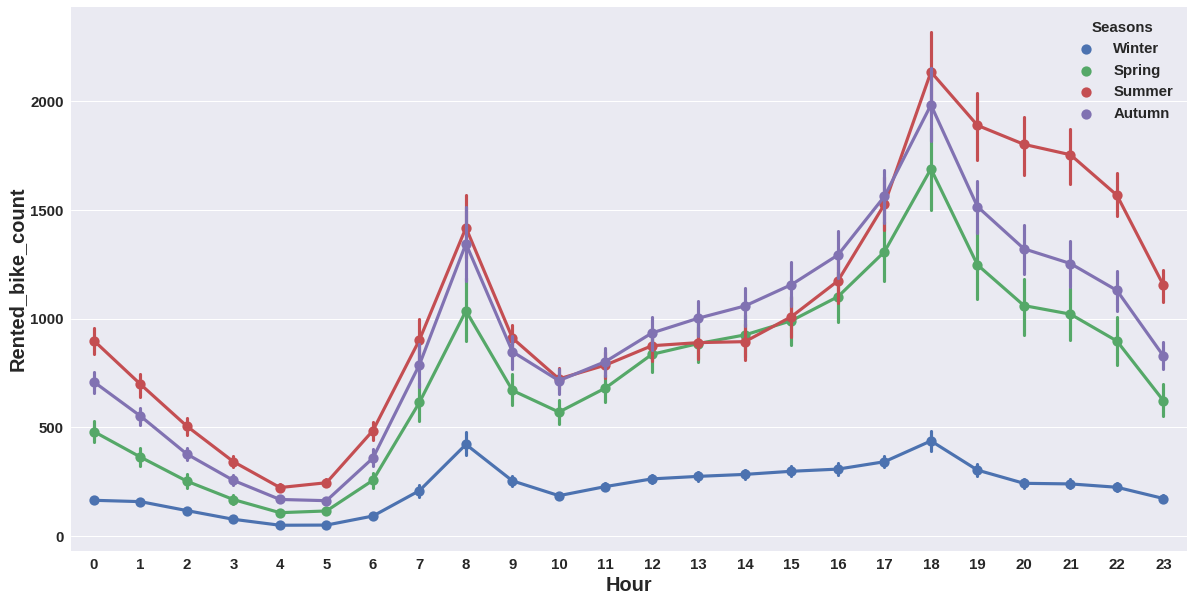

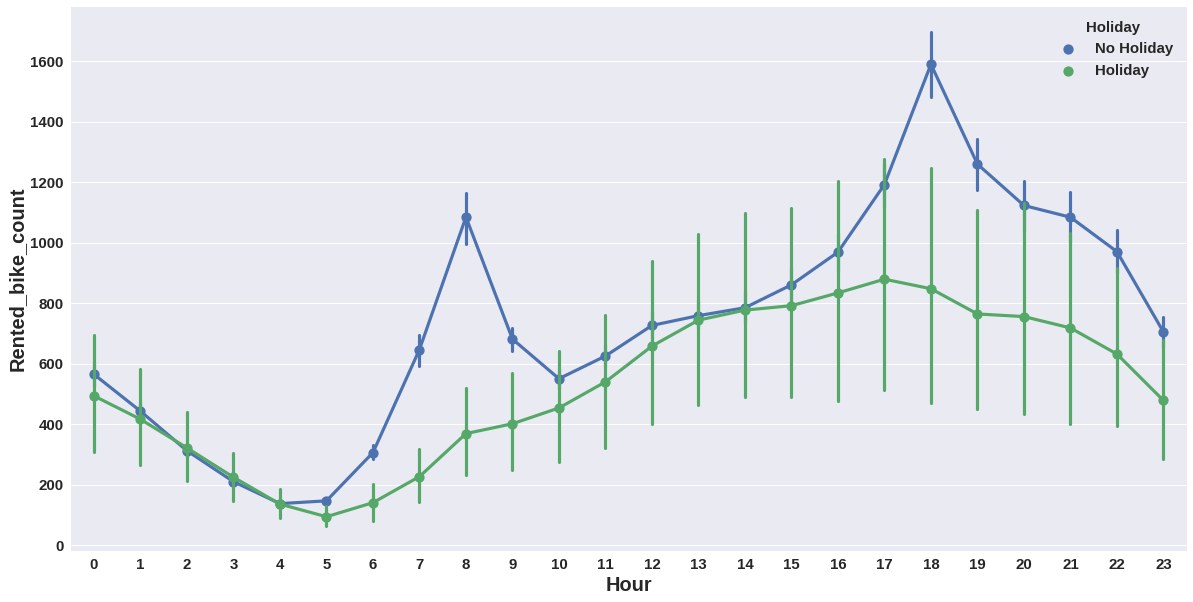

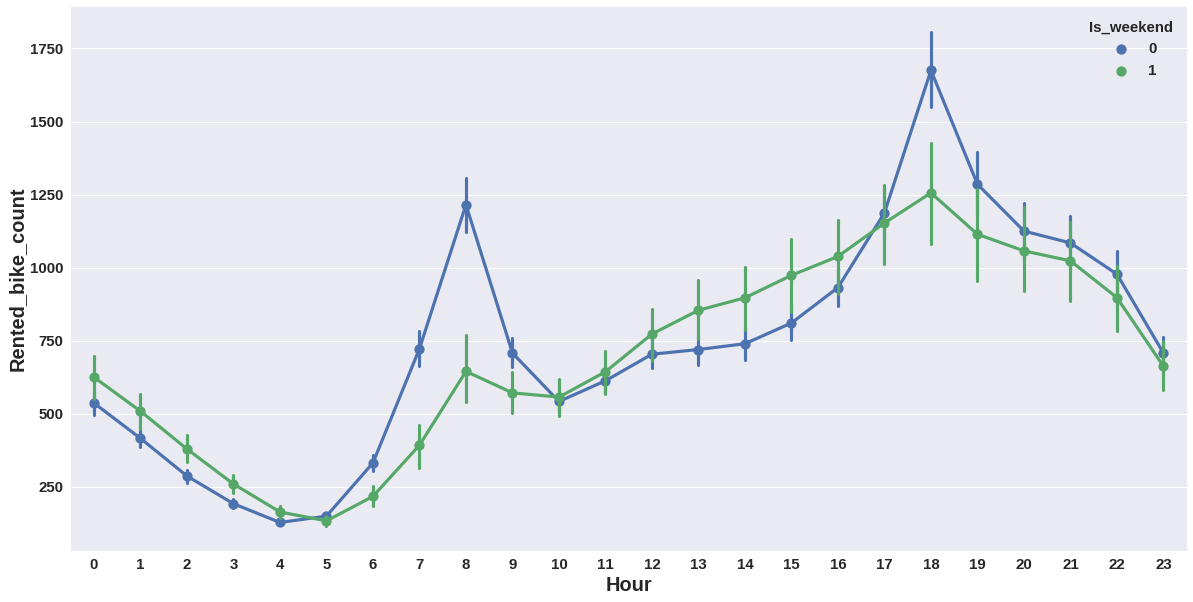

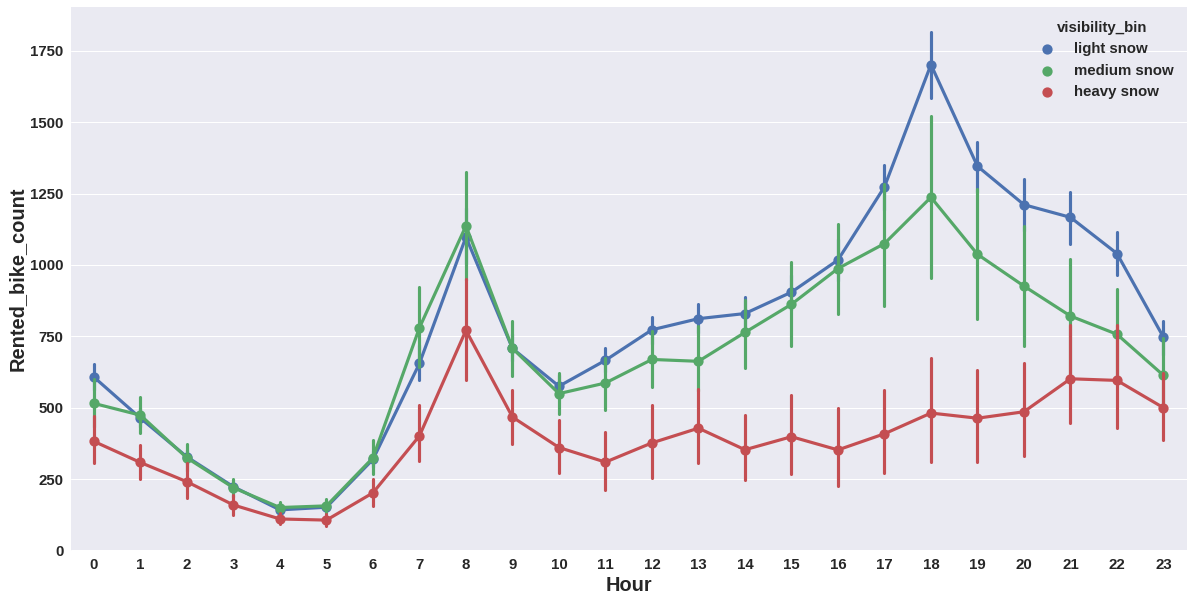

In [41]:
# Chart - 3 visualization code
for col in cat_features:
 plt.figure(figsize=(20,10))
 sns.pointplot(x=df['Hour'],y=df['Rented_bike_count'],hue=df[col])

##### 1. Why did you pick the specific chart?

Point plot helps to visualize the trends in 'rented_bike_count' per hour basis with respect to different categorical columns

##### 2. What is/are the insight(s) found from the chart?

1. It is clear that maximum bikes are rented during office opening and closing hrs.
2. Maximum bikes are rented during night time from 5PM to 10PM.Same trend as be observed in different seasons(winter having the lowest bike rental counts),across months,across non holidays and across weekends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Best time for bike rental business is during summer season from 5PM to 10PM during the night time.

#### 4. Plotting distribution plot to check 'Numeric features' distribution 

Analyze Numerical Data

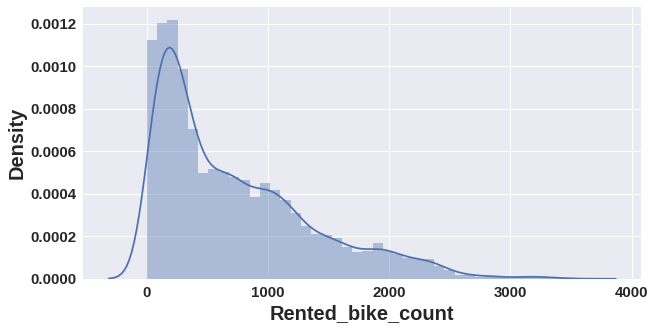

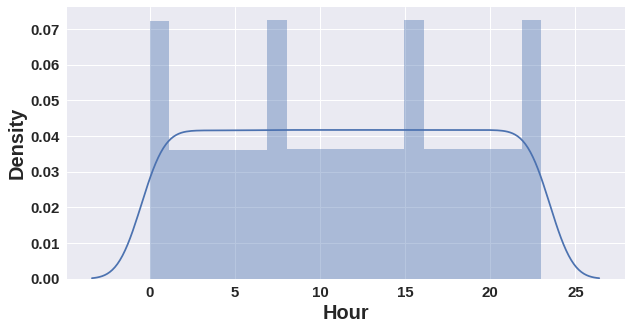

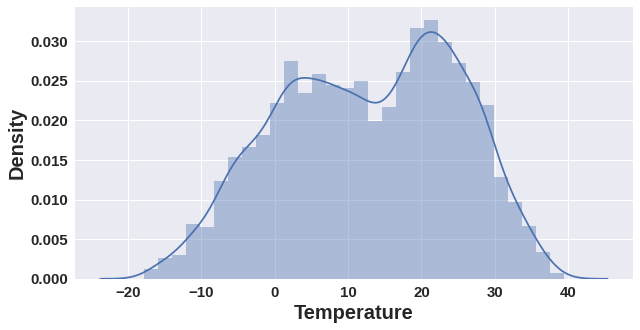

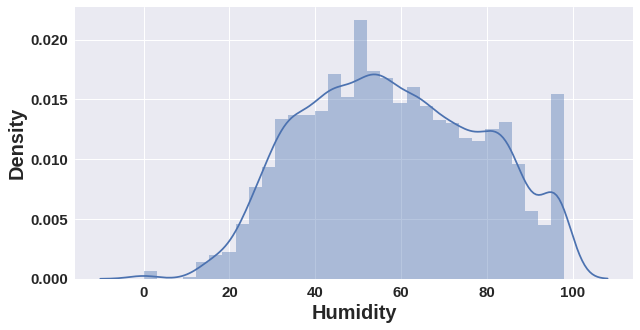

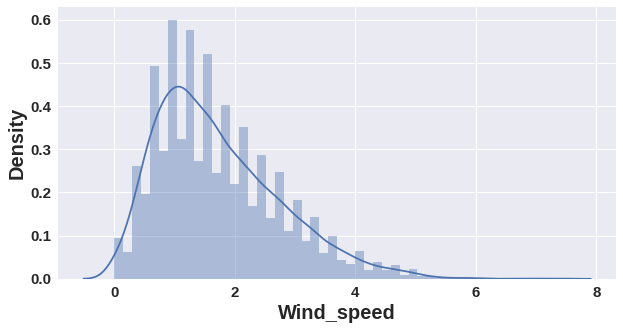

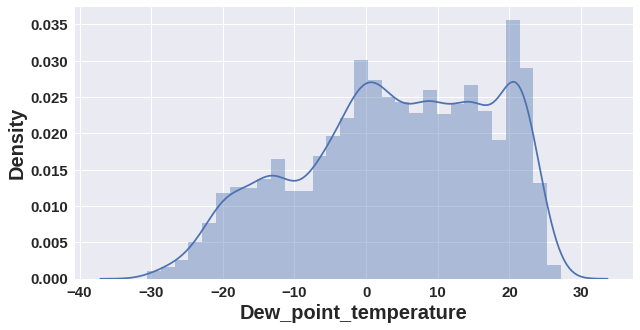

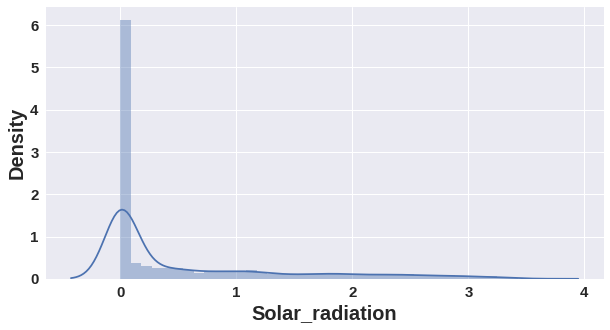

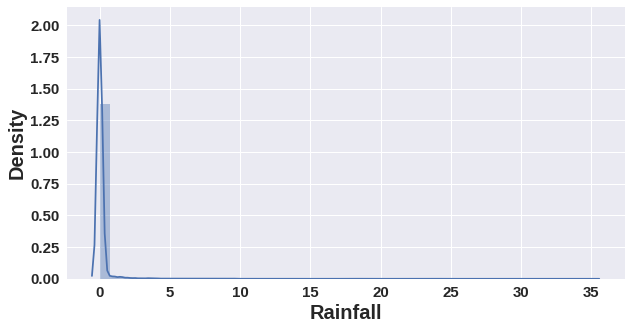

In [42]:
# Chart - 4 visualization code
for i in num_features :
  plt.figure(figsize=(10,5))
  sns.distplot(x=df[i])
  plt.xlabel(i)
plt.show()

##### 1. Why did you pick the specific chart?


1.  Numerical data is a data type expressed in numbers,rather than natural language description.Sometimes called quantitative data.

2.  we pick these chart so that we get to know whether our numerical features 
are positively skewed or not and how was our features distribution.



##### 2. What is/are the insight(s) found from the chart?


1.   We can see from chart that rented bike count ,Rainfall,Solar_radiation 
,Wind_speed features are positively skewed. 
2.   Dew_point_temperature,Temperature,Humidity this are features are
normally distributed.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


1.   As the Rented_bike_count feature is positively skewed hence there might be outliers which may affect our model accuracy, and we should take care of those.
2.   Temperature and Humidity columns are normally distributed; hence, these columns are most useful during model training.



#### 5. Plotting barplot to visualize how 'snowfall' affects 'rented_bike_count'

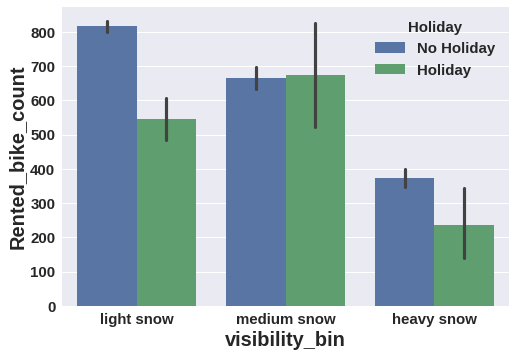

In [43]:
# Chart - 5 visualization code
# creating barplot to see relation between visibility_bin,Holiday column with Rented_bike_count
sns.barplot(x=df['visibility_bin'],y=df['Rented_bike_count'],hue = df['Holiday'])

##### 1. Why did you pick the specific chart?


1.   barplot give better visualization to give relation between two or more column






##### 2. What is/are the insight(s) found from the chart?


1.   During light snow and office working days there is high number of bikes are rented.
2.   In case of medium snow day almost equal number of bikes are rented whether it is holiday or not.Also if it is medium snow day and holiday people loved to go outside on bike as compared to ligh & heavy snow day holiday.

2.   during heavy snow very less people rent the bike.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


1. As the snowfall is less,visibility is high so rented_bike_count is high.
2. As the snowfall is high,visibility is less so rented_bike_count is low.

#### 6. Plotting boxplot to check outliers between categorical variables

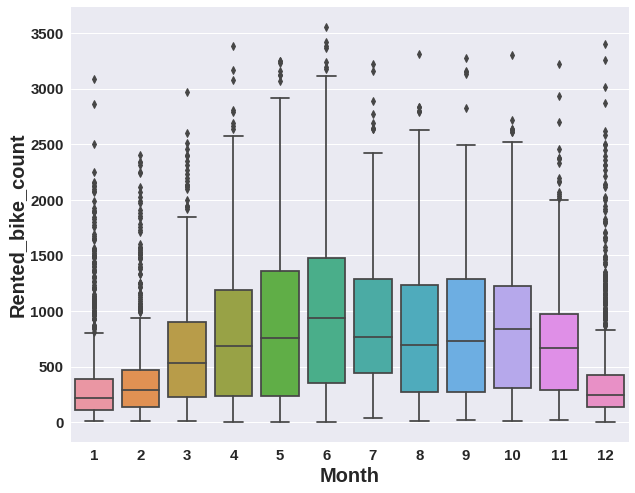

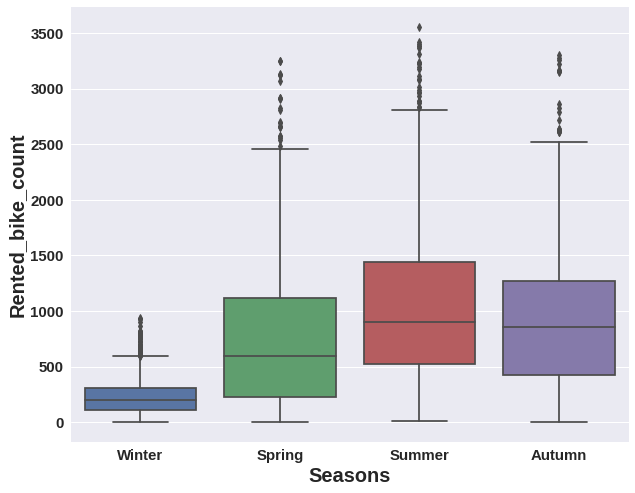

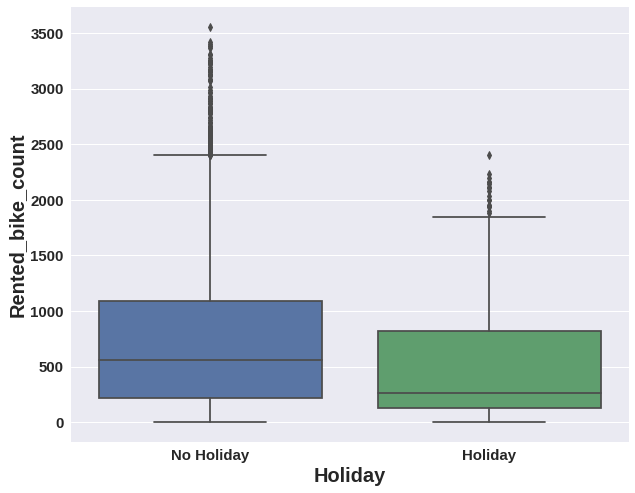

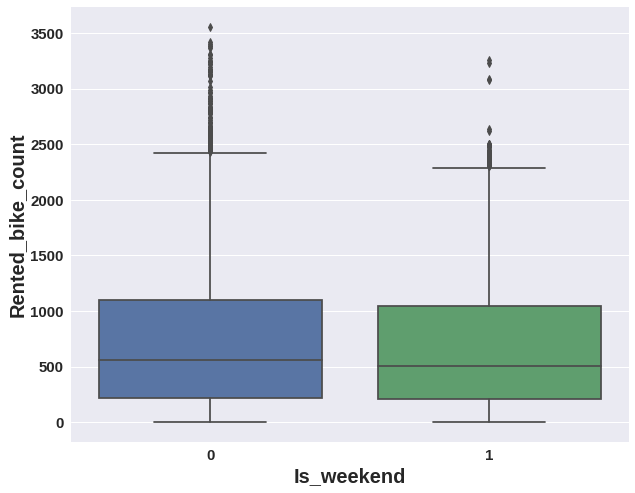

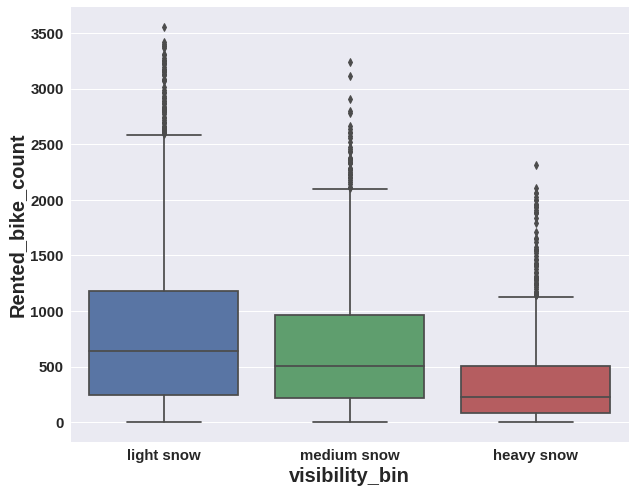

In [44]:
# plotting boxplot for categeorical features 
for col in cat_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df['Rented_bike_count']);

##### 1. Why did you pick the specific chart?

Answer Here.

1.   Boxplot is used to check the outliers




##### 2. What is/are the insight(s) found from the chart?

Answer Here
1. Except for feature 'Hour' every other categorical feature has outliers.
2. We will deal with it later.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
1.   Gained insights help to understand during outlier removal which features we should care most.


#### 7. Correlation Heatmap

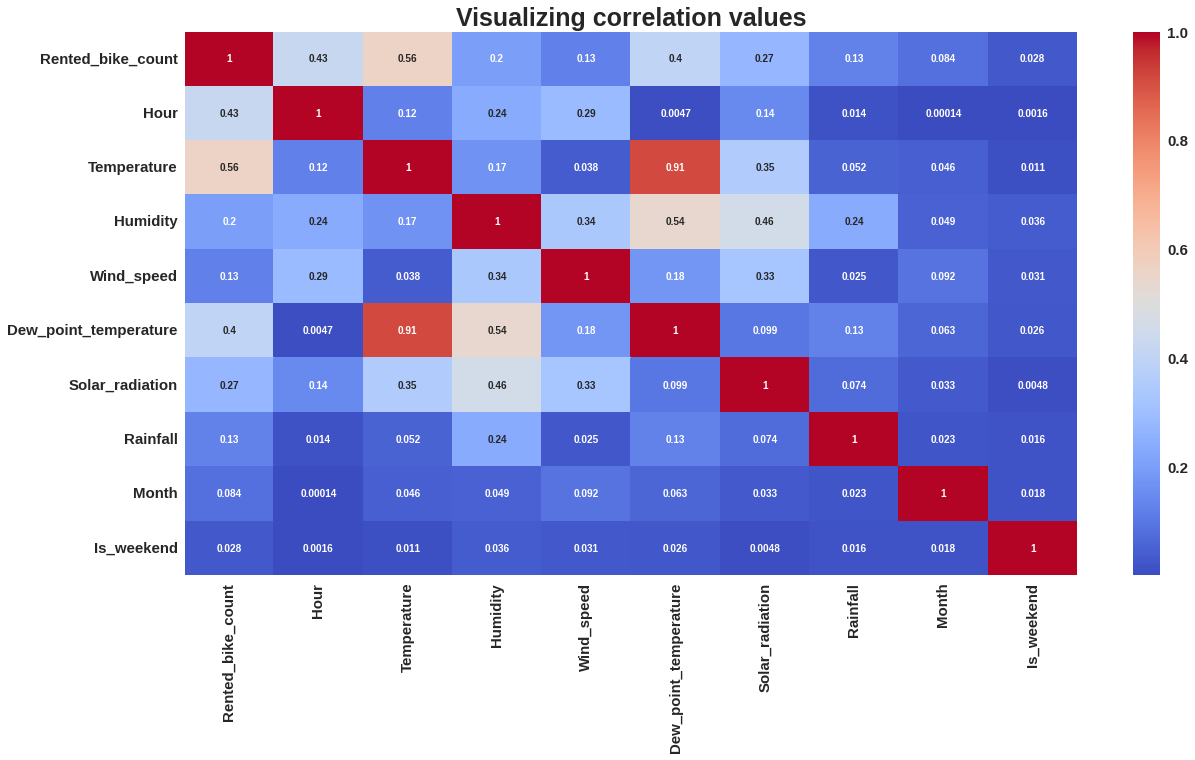

In [45]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True)
plt.title("Visualizing correlation values");

##### 1. Why did you pick the specific chart?

Heatmap helps to visualize the Pearsons correlation coeffient properly

##### 2. What is/are the insight(s) found from the chart?

1. 'Temperature' and 'Dew_point_temperature' are highly correlated.
2. 'Humidity' and 'Visibility','Humidity' and 'Dew_point_temperature','Humidity' and 'Solar Radiation' are highly correlated to eachother.
3. Target variable 'Rented_bike_count' is highly correlated to 'hour' and 'temperature' which means these are important features. 

#### 8 - Pair Plot 

<Figure size 1800x720 with 0 Axes>

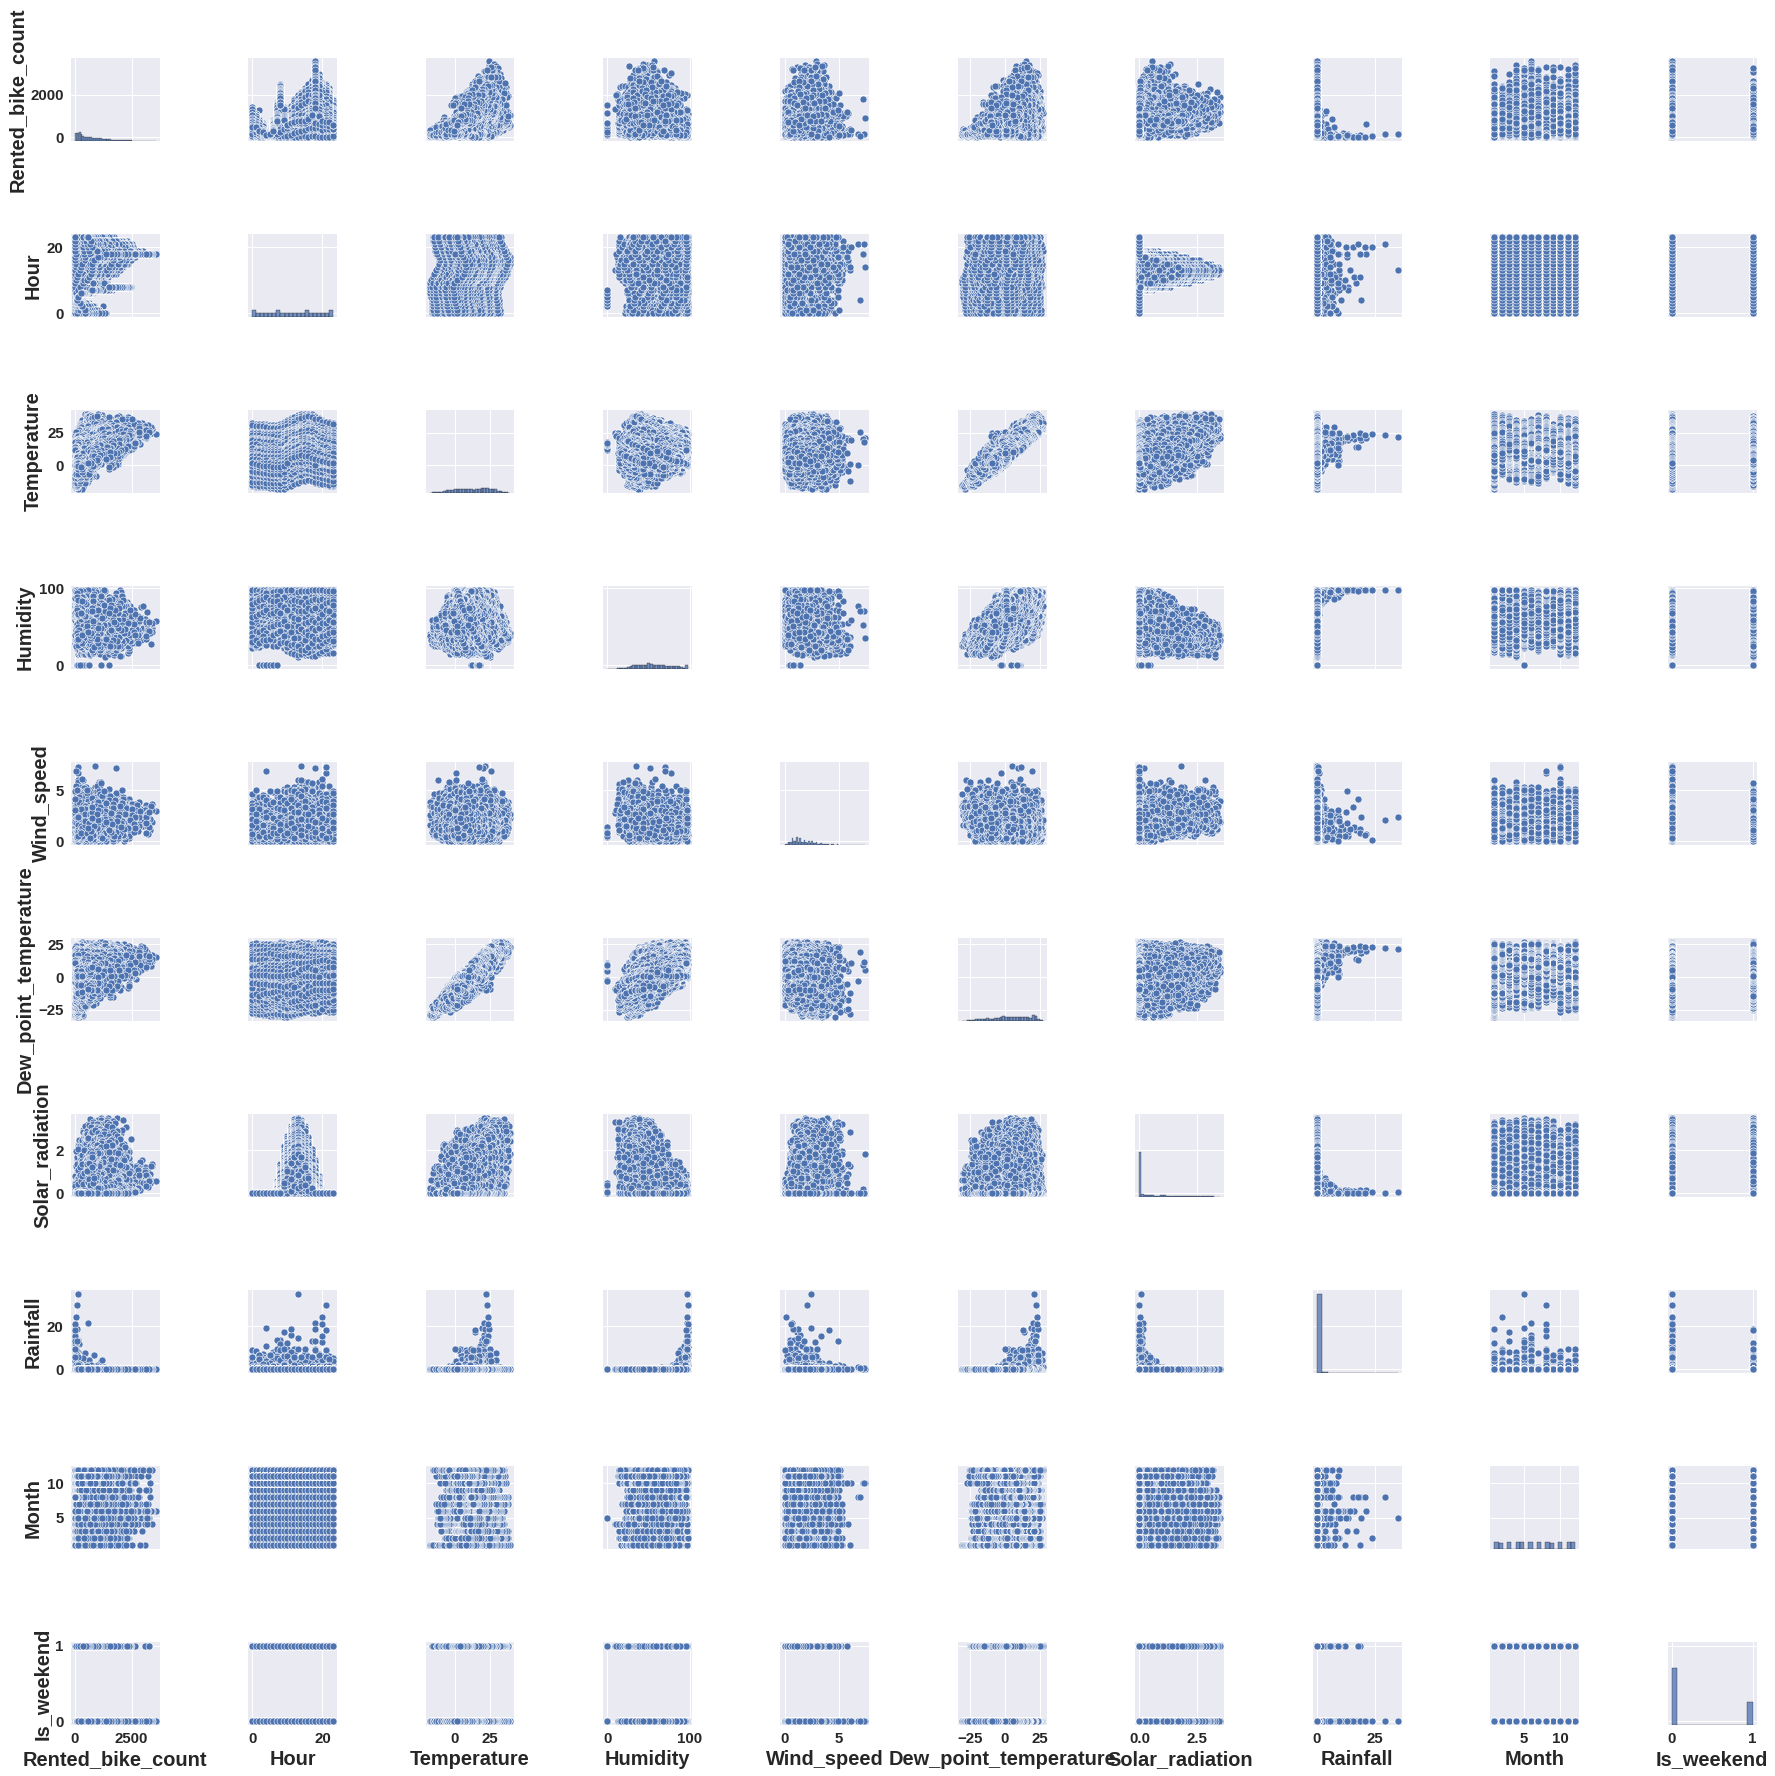

In [46]:
# Pair Plot visualization code
# Plotting pairplot
plt.figure(figsize=(25,10))
sns.pairplot(df);

##### 1. Why did you pick the specific chart?

Pairplot helps to understand the relationship between numerical features

##### 2. What is/are the insight(s) found from the chart?

1. 'Temperature' and 'Dew point temperature' are highly positively correlated and directly proportional to each other.
2. 'Humidity' and 'Dew point temperature' are directly proportional to each other.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. When temperature is in the range of 20 to 30,average rented_bike_count in an hour is greater than 1000.
2. There is relationship between visibility_bin and Holiday.
3. When temperature is in the range of 20 to 30,average rented_bike_count in an hour is greater than 1000.



### Hypothetical Statement - 1

When temperature is in the range of 20 to 30,average rented_bike_count in an hour is greater than 1000.

Answer Here.


*   Null Hypothesis : N = 1000
*   Alternate Hypothesis : N >1000
*   Test Type : Right tailed test







#### 2. Perform an appropriate statistical test.

In [47]:
# Importing libraries
from scipy.stats import *
import math

In [48]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

In [49]:
# Perform Statistical Test to obtain P-Value
hypo_1=df[(df['Temperature'] >= 20) & (df['Temperature'] <= 30)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 1000
sample_mean = hypo_1['Rented_bike_count'].mean()
size = len(hypo_1)
std=(variance(hypo_1['Rented_bike_count']))**0.5

In [50]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col='Rented_bike_count')
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

We have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.So rented_bike_count is higher than 1000 during temperature range of 20 to 30.So this temperature range is ideal for people for renting bikes

##### Why did you choose the specific statistical test?

Rented_bike_count is approx normally distributed

### Hypothetical Statement - 2

#### There is relationship between visibility_bin and Holiday.

*   Null Hypothesis (H0) : there is no relationship
*   Alternate Hypothesis (H1) : there is relationship
*   Test Type : Chi-square Test


#### 2. Perform an appropriate statistical test.

In [51]:
import scipy.stats as stats
from scipy.stats import chi2
df_chi = pd.crosstab(df['Holiday'],df['visibility_bin'])
print(df_chi)

visibility_bin  heavy snow  light snow  medium snow
Holiday                                            
Holiday                 49         294           65
No Holiday             986        5859         1212


In [52]:
val = stats.chi2_contingency(df_chi)
Expected_values = val[3]

In [53]:
df_chi.values

array([[  49,  294,   65],
       [ 986, 5859, 1212]])

In [54]:
#observed values
observed_val = df_chi.values
print('observed values :-\n',observed_val)

observed values :-
 [[  49  294   65]
 [ 986 5859 1212]]


In [55]:
no_of_rows = len(df_chi.iloc[:,0])
no_of_columns = len(df_chi.iloc[0,:])
ddof = (no_of_rows -1 )*(no_of_columns -1)
print("Degree of freedom: ",ddof)
alpha = 0.05

Degree of freedom:  2


In [56]:
#getting Chi_square value
chi_square = sum([(o - e)**2./e for o,e in zip(observed_val,Expected_values)])
chi_square_statistic = chi_square[0] + chi_square[1] + chi_square[2]
print('chi square statistic :',chi_square_statistic)
critical_value = chi2.ppf(q = 1 - alpha,df = ddof)
print('critical value:',critical_value)

chi square statistic : 0.24306164962301838
critical value: 5.991464547107979


In [57]:
#p-value
p_value = 1- chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
if p_value <= alpha:
  print('Reject H0,There is a relationship between visibility_bin and Holiday')
else:
  print("Accept H0,There is no relationship between visibility_bin and Holiday")

p-value: 0.8855637555922999
Accept H0,There is no relationship between visibility_bin and Holiday


##### Which statistical test have you done to obtain P-Value?

We have used Chi2-Test as the statistical testing to obtain P-value and found the result that Null hypothesis is accepted. SO there is no relationship between Holiday and visibility_bin features.

##### Why did you choose the specific statistical test?

To know relation between newly created column and holiday 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There were no missing values in the dataset

### 2. Handling Outliers

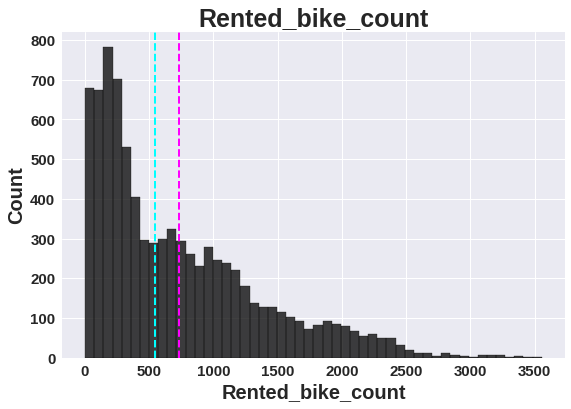

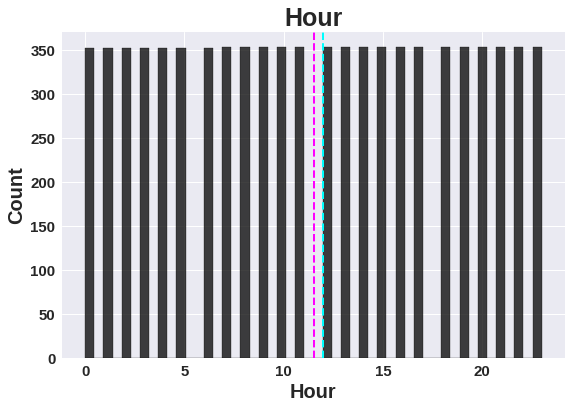

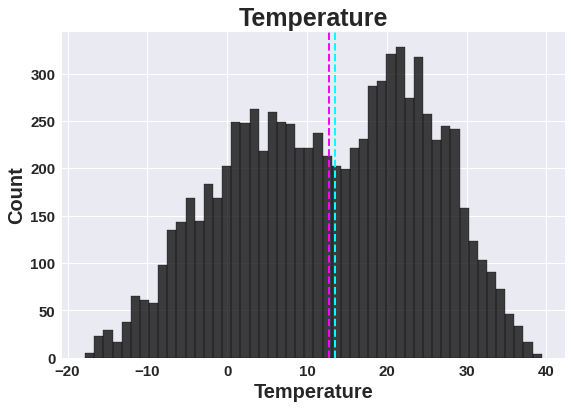

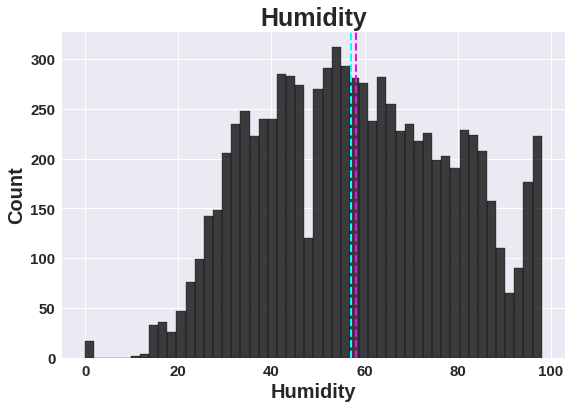

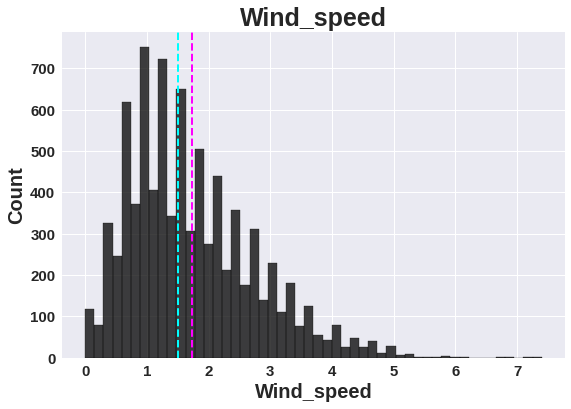

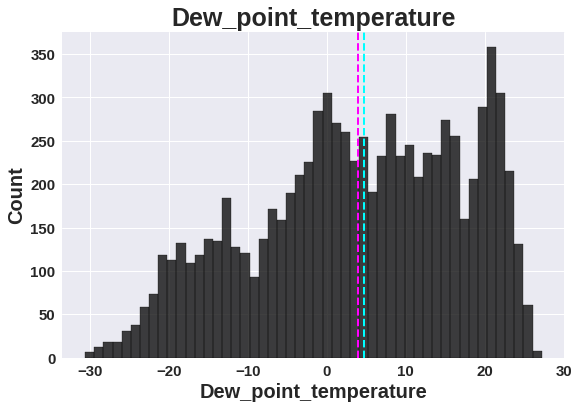

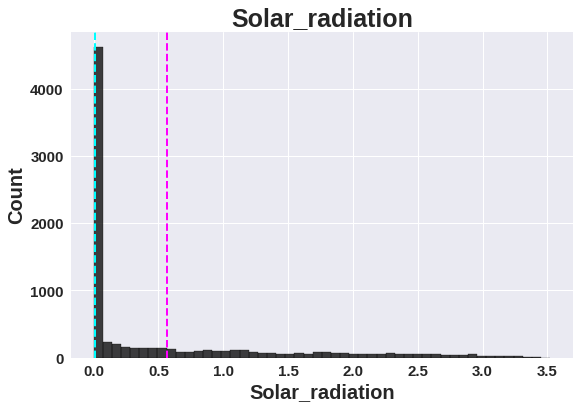

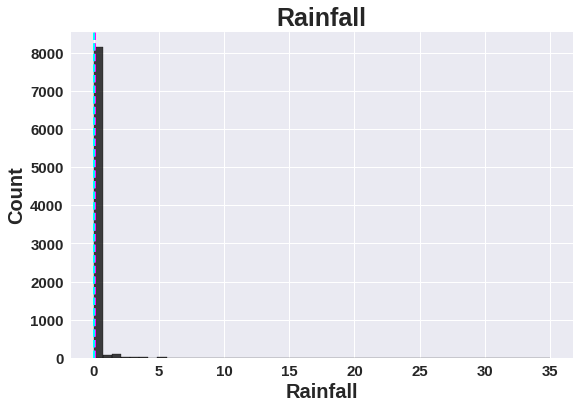

In [58]:
# Plotting histogram of numerical features
for col in num_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.histplot(x=df[col],color='black',ax=ax,bins=50)
    
    ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [59]:
#Finding the list of numerical column where data is skewed
skew_list = []
for i in num_features:
  if df[i].skew() > 1 :
    skew_list.append(i)

In [60]:
#list of numerical columns which are skewed
skew_list

['Rented_bike_count', 'Solar_radiation', 'Rainfall']

In [61]:
df['Rented_bike_count'].describe()

count    8465.000000
mean      729.156999
std       642.351166
min         2.000000
25%       214.000000
50%       542.000000
75%      1084.000000
max      3556.000000
Name: Rented_bike_count, dtype: float64

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

In [62]:
# Removing outliers based on IQR as it is a skewed distribution

# Calucating IQR
IQR_rented_bike = df['Rented_bike_count'].quantile(0.75)-df['Rented_bike_count'].quantile(0.25)

# Calculating Lower and Upper bounds
lower_bridge_rented_bike = df['Rented_bike_count'].quantile(0.25) - IQR_rented_bike*(1.5)
upper_bridge_rented_bike = df['Rented_bike_count'].quantile(0.75) + IQR_rented_bike*(1.5)

# Removing outliers
df = df[df['Rented_bike_count'] <= upper_bridge_rented_bike]

In [63]:
df['Rented_bike_count'].shape

(8313,)

In [64]:
#capping - change the outlier values to upper (or) lower limit values
df['Rented_bike_count'] = np.where(df['Rented_bike_count']>upper_bridge_rented_bike,upper_bridge_rented_bike,np.where(df['Rented_bike_count']<lower_bridge_rented_bike,lower_bridge_rented_bike,df['Rented_bike_count']))

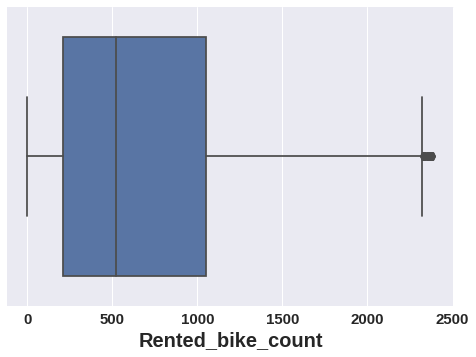

In [65]:
sns.boxplot(df['Rented_bike_count'])

In [66]:
#applyting Z-score method for Rainfall 
upper_limit_rain1 = df['Rainfall'].mean() +3*df['Rainfall'].std()
lower_limit_rain2 = df['Rainfall'].mean() -3*df['Rainfall'].std()

In [67]:
#applyting Z-score method for Solar_radiation
upper_limit_solar = df['Solar_radiation'].mean() +3*df['Solar_radiation'].std()
lower_limit_solar = df['Solar_radiation'].mean() -3*df['Solar_radiation'].std()

In [68]:
#capping - change the outlier values to upper (or) lower limit values for Solar_radiation
df['Solar_radiation'] = np.where(df['Solar_radiation']>upper_limit_solar,upper_limit_solar,np.where(df['Solar_radiation']<lower_limit_solar,lower_limit_solar,df['Solar_radiation']))
#capping - change the outlier values to upper (or) lower limit values for Rainfall
df['Rainfall'] = np.where(df['Rainfall']>upper_limit_rain1,upper_limit_rain1,np.where(df['Rainfall']<lower_limit_rain2,lower_limit_rain2,df['Rainfall']))

In [69]:
df.head()

Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  \
0              254.0     0         -5.2        37         2.2   
1              204.0     1         -5.5        38         0.8   
2              173.0     2         -6.0        39         1.0   
3              107.0     3         -6.2        40         0.9   
4               78.0     4         -6.0        36         2.3   

   Dew_point_temperature  Solar_radiation  Rainfall Seasons     Holiday  \
0                  -17.6              0.0       0.0  Winter  No Holiday   
1                  -17.6              0.0       0.0  Winter  No Holiday   
2                  -17.7              0.0       0.0  Winter  No Holiday   
3                  -17.6              0.0       0.0  Winter  No Holiday   
4                  -18.6              0.0       0.0  Winter  No Holiday   

  visibility_bin  Month  Is_weekend  
0     light snow      1           0  
1     light snow      1           0  
2     light snow      1           0  
3     light snow      1           0  
4     light snow      1           0

### 3. Categorical Encoding

In [70]:
df.head()

Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  \
0              254.0     0         -5.2        37         2.2   
1              204.0     1         -5.5        38         0.8   
2              173.0     2         -6.0        39         1.0   
3              107.0     3         -6.2        40         0.9   
4               78.0     4         -6.0        36         2.3   

   Dew_point_temperature  Solar_radiation  Rainfall Seasons     Holiday  \
0                  -17.6              0.0       0.0  Winter  No Holiday   
1                  -17.6              0.0       0.0  Winter  No Holiday   
2                  -17.7              0.0       0.0  Winter  No Holiday   
3                  -17.6              0.0       0.0  Winter  No Holiday   
4                  -18.6              0.0       0.0  Winter  No Holiday   

  visibility_bin  Month  Is_weekend  
0     light snow      1           0  
1     light snow      1           0  
2     light snow      1           0  
3     light snow      1           0  
4     light snow      1           0

In [71]:
# Encoding categorical columns

#applying One_Hot_Encoding for 'Seasons',Holiday','Functioning_day','visibility_bin'
df = pd.get_dummies(df,columns=['Seasons'],prefix = 'Seasons',drop_first=True)

# Using binary label encoding for 'Holiday' feature. Holiday=1 and No_holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

# Using label encoding for 'binned_visibility' feature. Light_snow=2,Medium_snow=1,Heavy_snow=0
df['visibility_bin'] = df['visibility_bin'].map({'light snow':2,'medium snow':1,'heavy snow':0})

In [72]:
df.head()

Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  \
0              254.0     0         -5.2        37         2.2   
1              204.0     1         -5.5        38         0.8   
2              173.0     2         -6.0        39         1.0   
3              107.0     3         -6.2        40         0.9   
4               78.0     4         -6.0        36         2.3   

   Dew_point_temperature  Solar_radiation  Rainfall  Holiday  visibility_bin  \
0                  -17.6              0.0       0.0        0               2   
1                  -17.6              0.0       0.0        0               2   
2                  -17.7              0.0       0.0        0               2   
3                  -17.6              0.0       0.0        0               2   
4                  -18.6              0.0       0.0        0               2   

   Month  Is_weekend  Seasons_Spring  Seasons_Summer  Seasons_Winter  
0      1           0               0               0               1  
1      1           0               0               0               1  
2      1           0               0               0               1  
3      1           0               0               0               1  
4      1           0               0               0               1

#### What all categorical encoding techniques have you used & why did you use those techniques?

1. One Hot Encoding:To encode more than 2 nominal categories in a feature this method is used.To avoid the problem of dummy trap one column is dropped to reduce multi-collinearity.
2. Binary label encoding:To label yes or no types of values in a feature.
3. Label encoding:To encode ordinal categories in a feature, this method is used.

### 4. Feature Manipulation & Selection

##### 1. Feature selection based on Pearsons correlation coefficient 

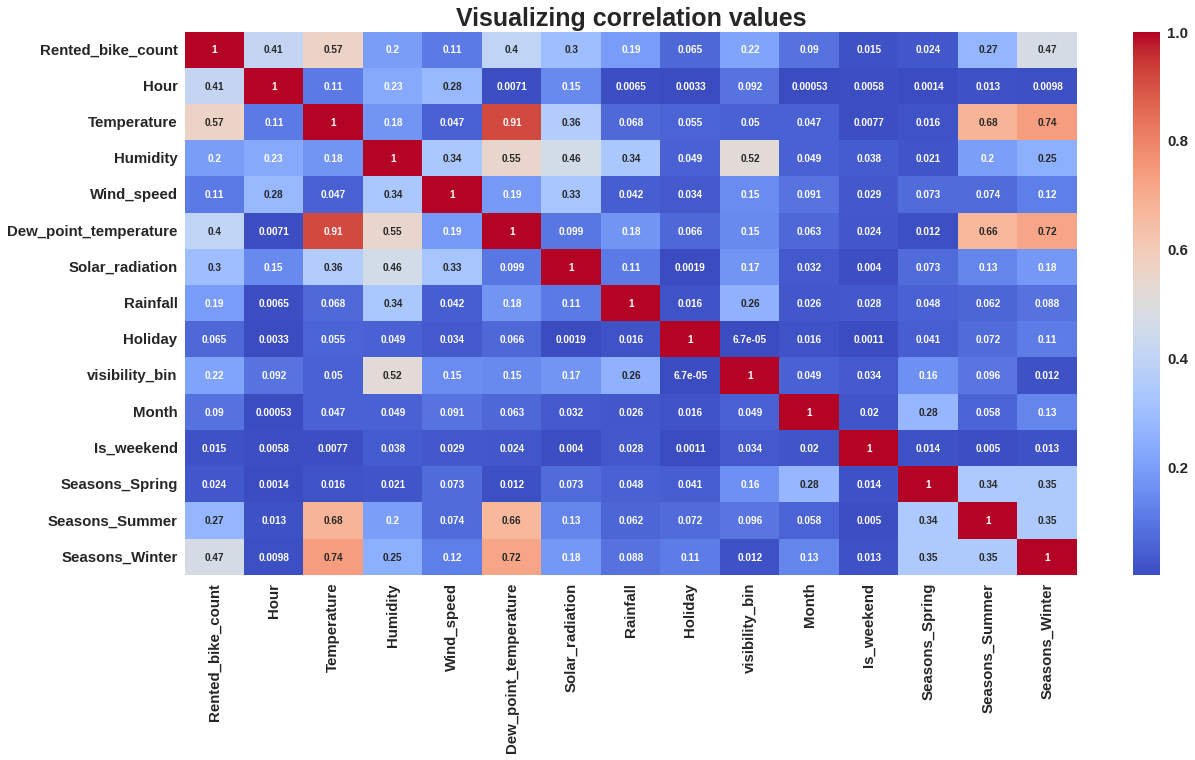

In [73]:
# Visualizing correlation values
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True)
plt.title("Visualizing correlation values");

From this we can see that

1.   'Dew_point temperature' has high correlation with 'Temperature'.
2.   'Solar_radiation' and 'Dew_point temperature' has high correlation with 'Humidity'
3.   Hence from this Peasons coefficient, 'Dew_point temperature' and 'Solar_radiation' should be dropped. 



In [74]:
# Select your features wisely to avoid overfitting
# Manipulate Features to minimize feature correlation and create new features

from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [75]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_bike_count','Dew_point_temperature','Solar_radiation']]])

variables       VIF
0             Hour  4.225522
1      Temperature  7.971403
2         Humidity  7.037430
3       Wind_speed  4.293230
4         Rainfall  1.196411
5          Holiday  1.074552
6   visibility_bin  5.607615
7            Month  4.731674
8       Is_weekend  1.404748
9   Seasons_Spring  2.208300
10  Seasons_Summer  3.483480
11  Seasons_Winter  3.475322

From this we can see that
1. Removing all those features which has VIF greater than 8
2. Hence from VIF method, 'Dew_point_temperature',  'Solar_radiation','Functioning_day' are the features to be removed.  

In [76]:
# Droping columns 'Dew_point_temperature','Solar_radiation','Wind_speed' as they have multicollinearity
df.drop(columns=['Dew_point_temperature','Solar_radiation'],axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

1. Variance inflation factor(VIF) method helps in reducing multi-collinearity between the features.
2. Also it helps to identifying the features which greatly effects the target variables through pearsons correlation values. 

##### Which all features you found important and why?

1. Except for 'Dew_point_temperature', 'Functioning_day' and 'Solar_radiation' all other features are important.
2. These features have high corelation with the target variable. 

### 5. Data Transformation

In [77]:
#Transforming data

# storing our independent features
x = df.drop(columns='Rented_bike_count',axis=1)

# creating variable to store our target feature and applying square root transformation to approximate to normal distribution
y = np.sqrt(df['Rented_bike_count'])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Square root transformation is used for target variable 'rented_bike_count' to reduce skewness and make approx normal distribution

### 8. Data Splitting

In [78]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,Y_train,Y_test = train_test_split(x.values,y.values,test_size=0.3,random_state=7)


##### What data splitting ratio have you used and why? 

30% data is used for testing and 70% for training to strike a balance between bias and variance.

### 6. Data Scaling

In [79]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)


##### Which method have you used to scale you data and why?

Standard Scaler is used for scaling to get data to range from -3 to 3 to get approx normal distribution

## ***7. ML Model Implementation***

### Linear Regression

In [80]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [81]:
# ML Model - 1 Implementation
linear_reg = LinearRegression()

# Fit the Algorithm
linear_reg.fit(X_train,Y_train)

# Predict on the model
#predict on train dataset
y_pred_train = linear_reg.predict(X_train)

#predict on test dataset
y_pred_test = linear_reg.predict(X_test)


In [82]:
# Check coefficents
linear_reg.coef_

array([ 3.56650075,  5.24382075, -2.38835034, -0.08191868, -2.72880453,
       -0.59821238,  0.11901417,  0.18701401, -0.35525975, -1.27498375,
       -1.35122232, -3.47538061])

In [83]:
coefficient_df = pd.DataFrame(linear_reg.coef_,index=x.columns,columns=['Coefficients'])
coefficient_df

Coefficients
Hour                3.566501
Temperature         5.243821
Humidity           -2.388350
Wind_speed         -0.081919
Rainfall           -2.728805
Holiday            -0.598212
visibility_bin      0.119014
Month               0.187014
Is_weekend         -0.355260
Seasons_Spring     -1.274984
Seasons_Summer     -1.351222
Seasons_Winter     -3.475381

In [84]:
# Check intercept
print(linear_reg.intercept_)

23.653737374447406


In [85]:
# check coefficient
print(linear_reg.coef_)

[ 3.56650075  5.24382075 -2.38835034 -0.08191868 -2.72880453 -0.59821238
  0.11901417  0.18701401 -0.35525975 -1.27498375 -1.35122232 -3.47538061]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Evaluation on training dataset

In [86]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 144739.02319682573.
The Root Mean Squared Error(RMSE) is 380.4458216314456.
The R2 Score is 0.5822569219403619.


In [87]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

# create training_result dataframe
training_results_df=pd.DataFrame(train_dict,index=[1])
training_results_df           

Model          MSE       RMSE  R2_score
1  Linear Regression  144739.0232  380.44582   0.58226

#### Evaluation on test dataset

In [88]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 141221.22013429683.
The Root Mean Squared Error(RMSE) is 375.79411934501695.
The R2 Score is 0.5875203646418071.


In [89]:
#Saving test data set results in dataframe.
test_dict={'Model':"Linear Regression",
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

# create training_result dataframe
testing_results_df=pd.DataFrame(test_dict,index=[1])
testing_results_df  

Model           MSE       RMSE  R2_score
1  Linear Regression  141221.22013  375.79412   0.58752

In [90]:
def Actual_vs_Predicted(y_test,y_pred_test):
  '''plot scatter plot of actual and predicted values'''
  try:
    plt.figure(figsize=(18,8))
    plt.title('Actual Vs Predicted')
    sns.regplot(x=y_test,y=y_pred_test,line_kws={'color':'black'})
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
  except:
    print('check your code')

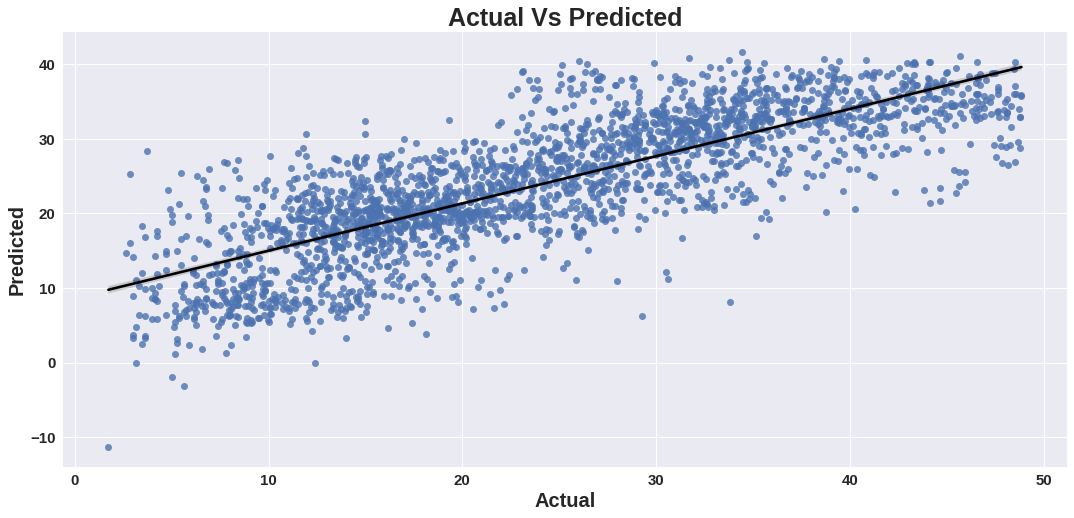

In [91]:
# plotting actual vs predicted graph
Actual_vs_Predicted(Y_test,y_pred_test)

1.  Model has not overfitted as we got similair R2 score for train(0.58226) and test dataset(0.58752). 

2. As overfiiting is not there,so regularization will have less impact.Then also we will try.  

#### Lasso Regularization

In [92]:
# Importing Libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

##### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
lasso_regressor = Lasso()
parameter = {'alpha':[0.001,0.002,0.004,0.005,0.01,0.05,0.03,0.02,0.1,0.2,0.4,0.5]}
grid_search = GridSearchCV(lasso_regressor,parameter,scoring='neg_mean_squared_error',cv=4)

# Fit the Algorithm
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.002, 0.004, 0.005, 0.01, 0.05, 0.03,
                                   0.02, 0.1, 0.2, 0.4, 0.5]},
             scoring='neg_mean_squared_error')

In [94]:
print(f'The best alpha value is {grid_search.best_params_}')
print(f'The best negative mean squared error value is {grid_search.best_score_}')

The best alpha value is {'alpha': 0.002}
The best negative mean squared error value is -47.57219636515374


In [95]:
# Fitting tuned model 
lasso_cv = grid_search.best_estimator_
lasso_cv.fit(X_train,Y_train)

# Predict on the model
y_pred_train = lasso_cv.predict(X_train)
y_pred_test = lasso_cv.predict(X_test)

In [96]:
lasso_cv.coef_

array([ 3.5650441 ,  5.23725318, -2.38657422, -0.07914532, -2.72740742,
       -0.59598625,  0.11835175,  0.18698537, -0.35292833, -1.26897277,
       -1.34181623, -3.47286858])

##### Evaluating training dataset

In [97]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 144756.45600735742.
The Root Mean Squared Error(RMSE) is 380.4687319706541.
The R2 Score is 0.5822066076866804.


In [98]:
train_dict={'Model':'Lasso CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df         

Model           MSE       RMSE  R2_score
0  Linear Regression  144739.02320  380.44582   0.58226
1           Lasso CV  144756.45601  380.46873   0.58221

##### Evaluating test dataset

In [99]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 141243.23088825514.
The Root Mean Squared Error(RMSE) is 375.82340385911994.
The R2 Score is 0.587456075523231.


In [100]:
test_dict={'Model':'Lasso CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df  

Model           MSE       RMSE  R2_score
0  Linear Regression  141221.22013  375.79412   0.58752
1           Lasso CV  141243.23089  375.82340   0.58746

#### Ridge Regularization

In [101]:
# Importing Libraries
from sklearn.linear_model import Ridge

##### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_regressor = Ridge()
parameter = {'alpha':[0.001,0.002,0.004,0.005,0.01,0.05,0.03,0.02,0.1,0.2,0.4,0.7,0.8]}
grid_search_ridge = GridSearchCV(ridge_regressor,parameter,scoring='neg_mean_squared_error',cv=4)
# Fit the Algorithm
grid_search_ridge.fit(X_train,Y_train)
# Predict on the model

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.002, 0.004, 0.005, 0.01, 0.05, 0.03,
                                   0.02, 0.1, 0.2, 0.4, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [103]:
print(f'The best alpha value is {grid_search_ridge.best_params_}')
print(f'The best negative mean squred error value is {grid_search_ridge.best_score_}')

The best alpha value is {'alpha': 0.8}
The best negative mean squred error value is -47.57279007074623


In [104]:
# Fitting tuned model 
ridge_cv = grid_search_ridge.best_estimator_
ridge_cv.fit(X_train,Y_train)

# Predict on the model
y_pred_train = ridge_cv.predict(X_train)
y_pred_test = ridge_cv.predict(X_test)

##### Evaluating on train dataset

In [105]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 144743.1465643584.
The Root Mean Squared Error(RMSE) is 380.4512407186477.
The R2 Score is 0.5822450211536423.


In [106]:
train_dict={'Model':'Ridge CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df          

Model           MSE       RMSE  R2_score
0  Linear Regression  144739.02320  380.44582   0.58226
1           Lasso CV  144756.45601  380.46873   0.58221
2           Ridge CV  144743.14656  380.45124   0.58225

##### Evaluating on test dataset

In [107]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 141226.84336023242.
The Root Mean Squared Error(RMSE) is 375.8016010612946.
The R2 Score is 0.5875039402957971.


In [108]:
test_dict={'Model':'Ridge CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df  

Model           MSE       RMSE  R2_score
0  Linear Regression  141221.22013  375.79412   0.58752
1           Lasso CV  141243.23089  375.82340   0.58746
2           Ridge CV  141226.84336  375.80160   0.58750

##### Which hyperparameter optimization technique have you used and why?

Grid search cross validation as it helps in reducing overfitting

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no such significant improvement.Probabilily model is not overfitted so regularization has less impact.

### Decision Tree Regressor

In [109]:
# Importing libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [110]:
# ML Model - 2 Implementation
decision_tree_regressor = DecisionTreeRegressor(random_state=7)

# Fit the Algorithm
decision_tree_regressor.fit(X_train,Y_train)

# Predict on the model
# Predict on train dataset
y_pred_train = decision_tree_regressor.predict(X_train)

# Predict on test dataset
y_pred_test = decision_tree_regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [111]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 0.0.
The Root Mean Squared Error(RMSE) is 0.0.
The R2 Score is 1.0.


In [112]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 76211.21291098637.
The Root Mean Squared Error(RMSE) is 276.06378413509145.
The R2 Score is 0.7774019139486612.


Looks like model has overfitted we will tune it next step using cross validation

#### 2. Cross- Validation & Hyperparameter Tuning

In [113]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.8 MB/s eta 0:00:00


In [114]:
# Importing libaries
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [115]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
search_space = {'criterion': Categorical(['squared_error','friedman_mse','absolute_error']),
                'max_depth':Integer(3,10),
                'min_samples_split':Integer(20,100),
                'min_samples_leaf':Integer(20,100),
                'min_impurity_decrease':Real(10,100,prior='log-uniform')}

decision_tree_regressor_1 = DecisionTreeRegressor(random_state=7)
bayes_search = BayesSearchCV(decision_tree_regressor_1,search_space,scoring='neg_mean_squared_error',cv=4,n_iter=32,random_state=7)

# Fit the Algorithm
bayes_search.fit(X_train,Y_train)

BayesSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=7), n_iter=32,
              random_state=7, scoring='neg_mean_squared_error',
              search_spaces={'criterion': Categorical(categories=('squared_error', 'friedman_mse', 'absolute_error'), prior=None),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'min_impurity_decrease': Real(low=10, high=100, prior='log-uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=20, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=20, high=100, prior='uniform', transform='normalize')})

In [116]:
print(f'The best alpha value is {bayes_search.best_params_}')
print(f'The best negative mean squred error value is {bayes_search.best_score_}')

The best alpha value is OrderedDict([('criterion', 'friedman_mse'), ('max_depth', 10), ('min_impurity_decrease', 10.0), ('min_samples_leaf', 20), ('min_samples_split', 20)])
The best negative mean squred error value is -23.798169649645768


In [117]:
# Fitting tuned model 
decision_tree_regressor_cv = bayes_search.best_estimator_
decision_tree_regressor_cv.fit(X_train,Y_train)

# Predict on the model
y_pred_train = decision_tree_regressor_cv.predict(X_train)
y_pred_test = decision_tree_regressor_cv.predict(X_test)

#### Evaluation on train data

In [118]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 52643.73291736837.
The Root Mean Squared Error(RMSE) is 229.4422213049908.
The R2 Score is 0.8480606366981945.


In [119]:
train_dict={'Model':'Decision Tree CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df             


Model           MSE       RMSE  R2_score
0  Linear Regression  144739.02320  380.44582   0.58226
1           Lasso CV  144756.45601  380.46873   0.58221
2           Ridge CV  144743.14656  380.45124   0.58225
3   Decision Tree CV   52643.73292  229.44222   0.84806

#### Evaluation on test data

In [120]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 64353.13098314242.
The Root Mean Squared Error(RMSE) is 253.67918910139716.
The R2 Score is 0.812037058050895.


In [121]:
test_dict={'Model':'Decision Tree CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df  

Model           MSE       RMSE  R2_score
0  Linear Regression  141221.22013  375.79412   0.58752
1           Lasso CV  141243.23089  375.82340   0.58746
2           Ridge CV  141226.84336  375.80160   0.58750
3   Decision Tree CV   64353.13098  253.67919   0.81204

##### Which hyperparameter optimization technique have you used and why?

Bayesian Cross Validation is used for hyperparameter tuning. As it smartly searches between range of values provided instead of providing manual values as in grid search 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is significant improvement in MSE and R2 score as compared to linear regression

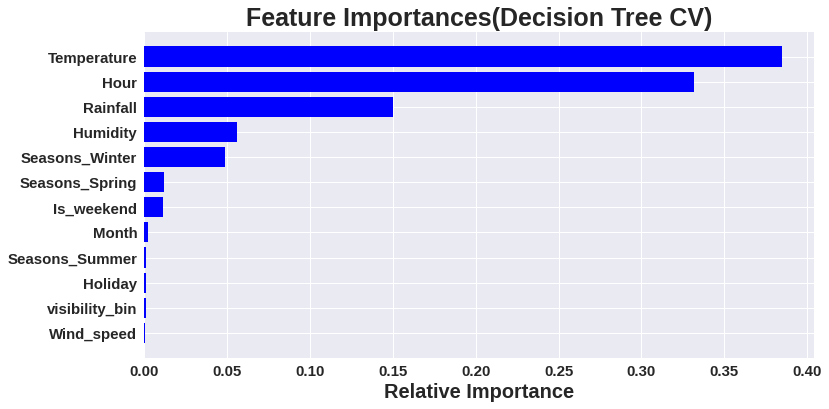

In [122]:
# Feature importances
imp_variables=x.columns
importances = decision_tree_regressor_cv.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree CV)')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance');

1. Temperature and Hour are the most important features.
2. Rainfall increases, the number of bike rented decreases thus it has a negative impact.

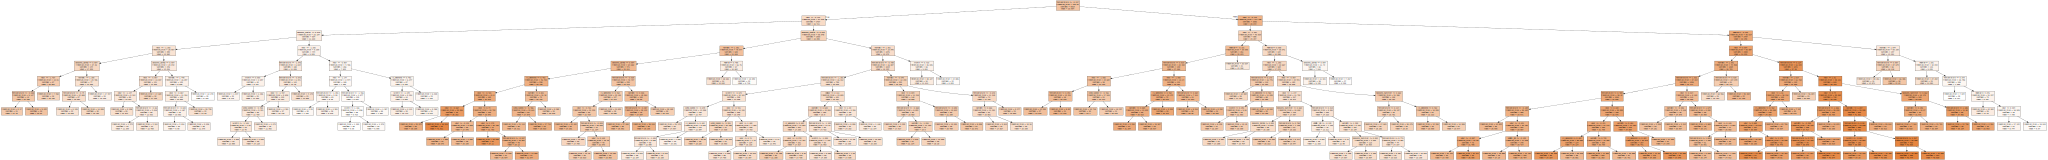

<Figure size 36x216 with 0 Axes>

In [123]:
plt.figure(figsize=(0.5,3))
graph = Source(tree.export_graphviz(decision_tree_regressor_cv, out_file=None,feature_names=x.columns,filled = True))
display(SVG(graph.pipe(format='svg')))

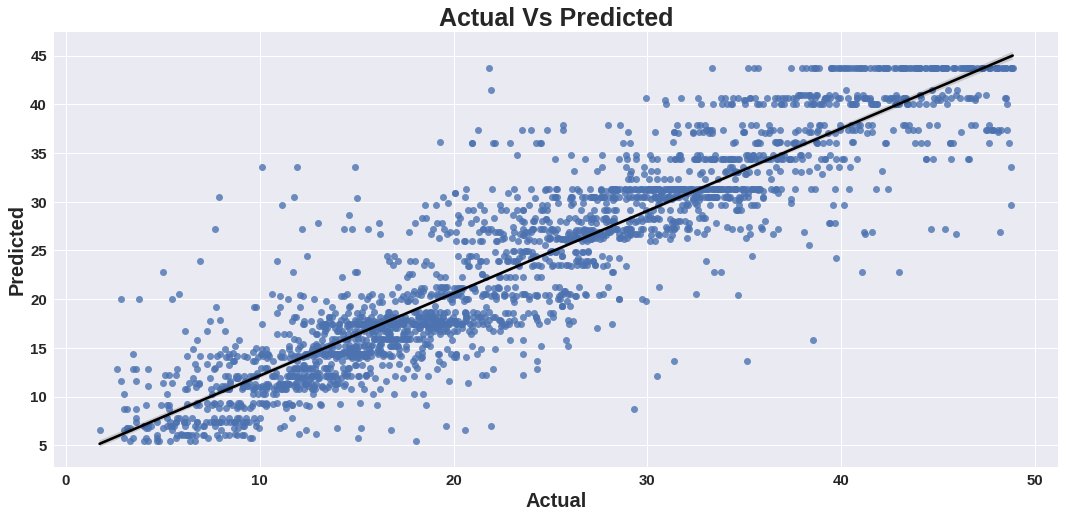

In [124]:
# Plotting actual vs predicted
Actual_vs_Predicted(Y_test,y_pred_test)

#### Random Forest Regressor

In [125]:
# Importing libraries
from sklearn.ensemble import RandomForestRegressor

In [126]:
# ML Model - 3 Implementation
random_forest_regressor = RandomForestRegressor(random_state=7)

# Fit the Algorithm
random_forest_regressor.fit(X_train,Y_train)

# Predict on the model
# Predict on train dataset
y_pred_train = random_forest_regressor.predict(X_train)

# Predict on test dataset
y_pred_test = random_forest_regressor.predict(X_test)

##### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

###### Evaluation on train data

In [127]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 5495.593470746535.
The Root Mean Squared Error(RMSE) is 74.13227010382546.
The R2 Score is 0.984138720287533.


###### Evaluation on test data

In [128]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 40128.000542733476.
The Root Mean Squared Error(RMSE) is 200.31974576345058.
The R2 Score is 0.8827939383629481.


 Model has overfitted.Lets tune the model in the next step 

#####  2. Cross- Validation & Hyperparameter Tuning

In [129]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
search_space = {'n_estimators':Integer(50,200),
                'max_depth':Integer(3,10),
                'min_samples_split':Integer(20,100),
                'min_samples_leaf':Integer(20,100),
                'max_features':Categorical(['sqrt','log2', None]),
                'min_impurity_decrease':Real(2,100,prior='log-uniform')
                }

random_forest_regressor_1 = RandomForestRegressor(criterion = 'friedman_mse',oob_score = True,random_state=7)
bayes_search = BayesSearchCV(random_forest_regressor_1,search_space,scoring='neg_mean_squared_error',cv=4,n_iter=32,random_state=7)

# Fit the Algorithm
bayes_search.fit(X_train,Y_train)

BayesSearchCV(cv=4,
              estimator=RandomForestRegressor(criterion='friedman_mse',
                                              oob_score=True, random_state=7),
              n_iter=32, random_state=7, scoring='neg_mean_squared_error',
              search_spaces={'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2', None), prior=None),
                             'min_impurity_decrease': Real(low=2, high=100, prior='log-uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=20, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=20, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=200, prior='uniform', transform='normalize')})

In [130]:
print(f'The best alpha value is {bayes_search.best_params_}')
print(f'The best negative mean squred error value is {bayes_search.best_score_}')

The best alpha value is OrderedDict([('max_depth', 10), ('max_features', None), ('min_impurity_decrease', 2.0), ('min_samples_leaf', 20), ('min_samples_split', 20), ('n_estimators', 84)])
The best negative mean squred error value is -20.37813752323615


In [131]:
# Fitting tuned model 
random_forest_regressor_cv = bayes_search.best_estimator_
random_forest_regressor_cv.fit(X_train,Y_train)

# Predict on the model
y_pred_train = random_forest_regressor_cv.predict(X_train)
y_pred_test = random_forest_regressor_cv.predict(X_test)

###### Evaluation on train data

In [132]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 49174.8927044053.
The Root Mean Squared Error(RMSE) is 221.75412669081334.
The R2 Score is 0.8580723388352863.


In [133]:
train_dict={'Model':'Random Forest CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df 

Model           MSE       RMSE  R2_score
0  Linear Regression  144739.02320  380.44582   0.58226
1           Lasso CV  144756.45601  380.46873   0.58221
2           Ridge CV  144743.14656  380.45124   0.58225
3   Decision Tree CV   52643.73292  229.44222   0.84806
4   Random Forest CV   49174.89270  221.75413   0.85807

###### Evaluation on test data

In [134]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 57212.96282324277.
The Root Mean Squared Error(RMSE) is 239.19231347023418.
The R2 Score is 0.8328920963814719.


In [135]:
test_dict={'Model':'Random Forest CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df  

Model           MSE       RMSE  R2_score
0  Linear Regression  141221.22013  375.79412   0.58752
1           Lasso CV  141243.23089  375.82340   0.58746
2           Ridge CV  141226.84336  375.80160   0.58750
3   Decision Tree CV   64353.13098  253.67919   0.81204
4   Random Forest CV   57212.96282  239.19231   0.83289

#### Gradient Boosting

In [136]:
# Importing libararies
from sklearn.ensemble import GradientBoostingRegressor

In [137]:
# ML Model - 2 Implementation
gradient_boosting_regressor = GradientBoostingRegressor(random_state=7)

# Fit the Algorithm
gradient_boosting_regressor.fit(X_train,Y_train)

# Predict on the model
# Predict on train dataset
y_pred_train = gradient_boosting_regressor.predict(X_train)

# Predict on test dataset
y_pred_test = gradient_boosting_regressor.predict(X_test)

##### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Evaluation on train data

In [138]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 50358.1978305004.
The Root Mean Squared Error(RMSE) is 224.40632306265437.
The R2 Score is 0.8546571055779324.


##### Evaluation on test data

In [139]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 54737.1243468608.
The Root Mean Squared Error(RMSE) is 233.95966393132983.
The R2 Score is 0.8401235375981152.


#####  2. Cross- Validation & Hyperparameter Tuning

In [140]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
search_space = {'loss':Categorical(['squared_error','absolute_error']),
                'learning_rate':Real(0.001,0.1,prior='log-uniform'),
                'n_estimators':Integer(100,300),
                'max_depth':Integer(10,20),
                'min_samples_split':Integer(50,150),
                'min_samples_leaf':Integer(50,150),
                'min_impurity_decrease':Real(2,50,prior='log-uniform')
                }

gradient_boosting_regressor_1 = GradientBoostingRegressor(random_state=7)
bayes_search = BayesSearchCV(gradient_boosting_regressor_1,search_space,scoring='neg_mean_squared_error',cv=4,n_iter=32,random_state=7)

# Fit the Algorithm
bayes_search.fit(X_train,Y_train)

BayesSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=7),
              n_iter=32, random_state=7, scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': Real(low=0.001, high=0.1, prior='log-uniform', transform='normalize'),
                             'loss': Categorical(categories=('squared_error', 'absolute_error'), prior=None),
                             'max_depth': Integer(low=10, high=20, prior='unif...sform='normalize'),
                             'min_impurity_decrease': Real(low=2, high=50, prior='log-uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize')})

In [141]:
print(f'The best alpha value is {bayes_search.best_params_}')
print(f'The best negative mean squred error value is {bayes_search.best_score_}')

The best alpha value is OrderedDict([('learning_rate', 0.05510190983080772), ('loss', 'squared_error'), ('max_depth', 20), ('min_impurity_decrease', 2.0), ('min_samples_leaf', 50), ('min_samples_split', 50), ('n_estimators', 300)])
The best negative mean squred error value is -12.9491812516896


In [142]:
# Fitting tuned model 
gradient_boosting_regressor_cv = bayes_search.best_estimator_
gradient_boosting_regressor_cv.fit(X_train,Y_train)

# Predict on the model
y_pred_train = gradient_boosting_regressor_cv.predict(X_train)
y_pred_test = gradient_boosting_regressor_cv.predict(X_test)

##### Evaluation on train data

In [143]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 16266.875306547216.
The Root Mean Squared Error(RMSE) is 127.5416610623651.
The R2 Score is 0.9530508468906236.


In [144]:
train_dict={'Model':'Gradient Boosting Regressor CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df 

Model           MSE       RMSE  R2_score
0               Linear Regression  144739.02320  380.44582   0.58226
1                        Lasso CV  144756.45601  380.46873   0.58221
2                        Ridge CV  144743.14656  380.45124   0.58225
3                Decision Tree CV   52643.73292  229.44222   0.84806
4                Random Forest CV   49174.89270  221.75413   0.85807
5  Gradient Boosting Regressor CV   16266.87531  127.54166   0.95305

##### Evaluation test data

In [145]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 35275.452666277815.
The Root Mean Squared Error(RMSE) is 187.81760478261302.
The R2 Score is 0.89696728410189.


In [146]:
test_dict={'Model':'Gradient Boosting Regressor CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df 

Model           MSE       RMSE  R2_score
0               Linear Regression  141221.22013  375.79412   0.58752
1                        Lasso CV  141243.23089  375.82340   0.58746
2                        Ridge CV  141226.84336  375.80160   0.58750
3                Decision Tree CV   64353.13098  253.67919   0.81204
4                Random Forest CV   57212.96282  239.19231   0.83289
5  Gradient Boosting Regressor CV   35275.45267  187.81760   0.89697

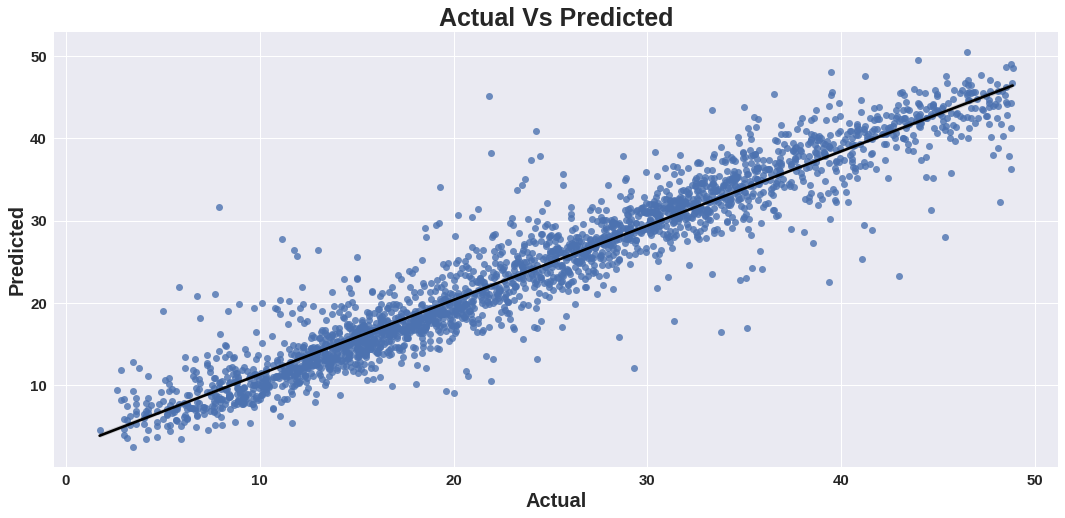

In [147]:
# Plotting actual vs predicted
Actual_vs_Predicted(Y_test,y_pred_test)

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

1. Mean squared Error(MSE) and R2 score is good metric for evaluating regression problem, it helps to capture errors which needs to be minimized.
2. Here we have used the R2 score to select the best model for the problem statement.  

### XG Boosting

In [148]:
# Importing libararies
from xgboost import XGBRegressor

In [149]:
# ML Model - 3 Implementation
xgb_regressor = XGBRegressor(seed=7)

# Fit the Algorithm
xgb_regressor.fit(X_train,Y_train)

# Predict on the model
# Predict on train dataset
y_pred_train = xgb_regressor.predict(X_train)

# Predict on test dataset
y_pred_test = xgb_regressor.predict(X_test)

[14:08:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [150]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 49812.09683421534.
The Root Mean Squared Error(RMSE) is 223.1862380036353.
The R2 Score is 0.8562332521214208.


In [151]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 53314.16136355778.
The Root Mean Squared Error(RMSE) is 230.89859541270013.
The R2 Score is 0.8442797348885993.


#### 2. Cross- Validation & Hyperparameter Tuning

In [152]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
search_space = {
                'eta':Real(0.01,0.1,prior='log-uniform'),
                'n_estimators':Integer(150,300),
                'max_depth':Integer(8,15),
                'gamma':Real(2,40,prior='log-uniform'),
                'subsample':Real(0.5,0.9,prior='log-uniform'),
                'colsample_bytree':Real(0.5,0.9,prior='log-uniform')
                }

xgb_regressor_1 = XGBRegressor(seed=7)
bayes_search = BayesSearchCV(xgb_regressor_1,search_space,scoring='neg_mean_squared_error',cv=4,n_iter=32,random_state=7)

# Fit the Algorithm
bayes_search.fit(X_train,Y_train)

[14:08:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

BayesSearchCV(cv=4, estimator=XGBRegressor(seed=7), n_iter=32, random_state=7,
              scoring='neg_mean_squared_error',
              search_spaces={'colsample_bytree': Real(low=0.5, high=0.9, prior='log-uniform', transform='normalize'),
                             'eta': Real(low=0.01, high=0.1, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=2, high=40, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=8, high=15, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=150, high=300, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=0.9, prior='log-uniform', transform='normalize')})

In [153]:
print(f'The best alpha value is {bayes_search.best_params_}')
print(f'The best negative mean squred error value is {bayes_search.best_score_}')

The best alpha value is OrderedDict([('colsample_bytree', 0.9), ('eta', 0.06661565802520823), ('gamma', 3.6331484403596517), ('max_depth', 8), ('n_estimators', 300), ('subsample', 0.9)])
The best negative mean squred error value is -12.27851322360267


In [154]:
# Fitting tuned model 
xgb_regressor_cv = bayes_search.best_estimator_
xgb_regressor_cv.fit(X_train,Y_train)

# Predict on the model
y_pred_train = xgb_regressor_cv.predict(X_train)
y_pred_test = xgb_regressor_cv.predict(X_test)

[14:13:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### Evaluation on train data

In [155]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_train)**2,(y_pred_train)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_train)**2,(y_pred_train)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 2698.397320753944.
The Root Mean Squared Error(RMSE) is 51.94610014961608.
The R2 Score is 0.9922119358159082.


In [156]:
train_dict={'Model':'XGB Regressor CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df 

Model           MSE       RMSE  R2_score
0               Linear Regression  144739.02320  380.44582   0.58226
1                        Lasso CV  144756.45601  380.46873   0.58221
2                        Ridge CV  144743.14656  380.45124   0.58225
3                Decision Tree CV   52643.73292  229.44222   0.84806
4                Random Forest CV   49174.89270  221.75413   0.85807
5  Gradient Boosting Regressor CV   16266.87531  127.54166   0.95305
6                XGB Regressor CV    2698.39732   51.94610   0.99221

#### Evaluation on test data

In [157]:
# Visualizing evaluation Metric Score chart

#Calculate  Mean Squared Error
MSE=mean_squared_error((Y_test)**2,(y_pred_test)**2)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score((Y_test)**2,(y_pred_test)**2)
print(f"The R2 Score is {R2}.")

The Mean Squred Error(MSE) is 33335.12966656224.
The Root Mean Squared Error(RMSE) is 182.57910522993106.
The R2 Score is 0.9026345890765863.


In [158]:
test_dict={'Model':'XGB Regressor CV',
             'MSE':round(MSE,5),
             'RMSE':round(RMSE,5),
             'R2_score':round(R2,5)}

testing_results_df=testing_results_df.append(test_dict,ignore_index=True)
testing_results_df 

Model           MSE       RMSE  R2_score
0               Linear Regression  141221.22013  375.79412   0.58752
1                        Lasso CV  141243.23089  375.82340   0.58746
2                        Ridge CV  141226.84336  375.80160   0.58750
3                Decision Tree CV   64353.13098  253.67919   0.81204
4                Random Forest CV   57212.96282  239.19231   0.83289
5  Gradient Boosting Regressor CV   35275.45267  187.81760   0.89697
6                XGB Regressor CV   33335.12967  182.57911   0.90263

##### Which hyperparameter optimization technique have you used and why?

Bayesian Cross Validation is used for hyperparameter tuning. As it smartly searches between range of values provided instead of providing manual values as in grid search 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is very little improvement as compared to Gradient Boosting

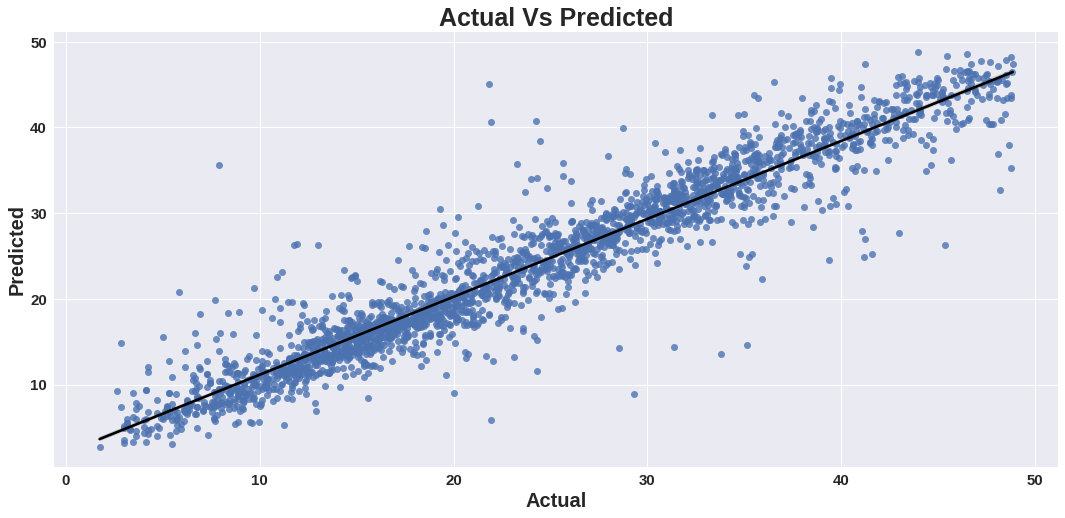

In [159]:
# Plotting actual vs predicted
Actual_vs_Predicted(Y_test,y_pred_test)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. Mean squared Error(MSE) and R2 score is good metric for evaluating regression problem, it helps to capture errors which needs to be minimized.
2. Here we have used the R2 score to select the best model for the problem statement.  

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the obtained R2 score on test dataset Gradient Boosting gives more accurate results.Hence Gradient Boosting is the selected model

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Gradient Boosting works on boosting technique.In boosting,multiple decision trees(weak learners) are trained in series based on the errors of previous models.Final output is given as, 
Output = Base learner + alpha(DT1) + alpha(DT2).... + alpha(DTn) 
where alpha = Learning Rate,
      DT = Decision Tree Output

#### Model Explainability using LIME


In [160]:
# Installing Lime
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=479c1b4014d278403702133dfd3de0bdb80d16e726371a2b9a861fc01b1e9c86
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [161]:
# Importing libraries
import lime
from lime import lime_tabular

In [168]:
# Fitting lime explainer
interpretor = lime_tabular.LimeTabularExplainer(training_data=X_train,feature_names=x.columns,mode='regression')
exp = interpretor.explain_instance(data_row=X_test[7],predict_fn=gradient_boosting_regressor_cv.predict)
exp.show_in_notebook(show_table=True)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [163]:
# Save the File
import pickle
with open('model_pickle_regression','wb') as f:
  pickle.dump(gradient_boosting_regressor_cv,f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [164]:
# Load the File and predict unseen data.
with open('model_pickle_regression','rb') as f:
  mp = pickle.load(f)

In [165]:
test_point = np.array([X_test[7]])

In [166]:
test_point

array([[ 1.24751065,  0.72037446, -0.60039824, -1.56927979, -0.20093392,
        -0.2248347 ,  0.57962335,  0.72339718,  1.56307238, -0.58429579,
        -0.59038256, -0.59488279]])

In [167]:
mp.predict(test_point)[0]

42.494275430947944

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Linear Regreesion with Lasso and Ridge regularization**
1. Linear Regression gave underfitted model as the feature relation with the target variable was non-linear one.
2. Also the lasso and ridge were not helpfull as the model did not overfitted it underfitted due to non-linear relationship.

**Decision Tree**
1. Decision Tree gave good increase in R2 score as compared to linear regression.
2. Train R2=0.84806 and Test R2=0.81204 were obtained.

**Random Forest**
1. Gave little gain as compared to decision tree.
2. Train R2=0.85807 and Test R2=0.83289 were obtained.

**Gradient Boosting and XGB Boosting**
1. Both boosting techniques gave very good R2 score,better than any of the model.
2. The reason for choosing Gradient Boosting over XGB Boosting is because very small difference between (train R2=0.95305 and test R2=0.89697) for Gradient Boosting as compared to XGB Boosting which is (train R2=0.99221 and test R2=0.90263)
3. Even though XGB and Gradient Boosting performed equally due to relatively large difference between Train and Test error XGB was not not selected.
4. Gradient Boosting seems to have generalized well on the given data.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***